# Dependency of change of AUC on the epoch (to which the models were trained)

For epochs 1 to 120, both types of weighting methods have been used to train the respective model.
For each of these epochs, AUCs have been generated with the following parameters: raw (undisturbed), + noise (so far sigma={0.05, 0.1}), + fgsm (so far epsilon=0.01).

The generation of AUCs takes quite some time, especially when the attacks are applied. Therefore this process was split into several chunks, mostly consisting of 20 epochs each. The results were stored in lists and written to files (using pickle). For the next iteration, all AUCs were stored in one file directly.

In [1]:
import pickle

In [41]:
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

In [54]:
import time
import gc

### Some information that will be used to plot the data

In [45]:
with open('/home/um106329/aisafety/length_cleaned_data_test.npy', 'rb') as f:
    length_data_test = np.load(f)
at_epoch = [i for i in range(1,121)]    

## Read files containing the AUCs

### Example

In [11]:
with open('/home/um106329/aisafety/models/weighted/compare/auc/auc2_raw_[1,2,3,4,5,6,7,8,9,10].data', 'rb') as file:
    aucc2_dummy = pickle.load(file)

In [12]:
# Output is jsut a list containing AUCs
print(aucc2_dummy)

[0.7764432887267216, 0.5655494181500419, 0.7281281467537504, 0.7832085527722754, 0.8099519927351595, 0.8251469975765607, 0.8331684557175739, 0.8387736870480863, 0.8435106557242446, 0.8475887125036364]


### Build lists that get the correct file paths

In [21]:
# For method 2 and raw, the intervals are 1-10,11-20,21-40,41-60,61-80,81-100,101-120
# For method 2 noise, fgsm, it's always steps of 20
# For method 0 raw, noise, fgsm, it's always steps of 20

method0raw = []
method0raw.append([i for i in range(1,11)])
method0raw.append([i for i in range(11,21)])
for a in range(1,6):
    method0raw.append([i for i in range(a*20+1,(a+1)*20+1)])

    
all_other_intervals = []
for a in range(0,6):
    all_other_intervals.append([i for i in range(a*20+1,(a+1)*20+1)])
print(method0raw)
print(all_other_intervals)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,

### Read and merge files

The first ones (just one fixed sigma, one epsilon chosen, more values follow later)

In [64]:
#auc0 raw
auc0_raw = []
for entry in all_other_intervals:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc0_raw_{path}.data', 'rb') as file:
        auc0_raw.append(pickle.load(file))
#print(auc0_raw)
auc0_raw = [item for sublist in auc0_raw for item in sublist]
print(auc0_raw)

# auc2 raw
auc2_raw = []
for entry in method0raw:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc2_raw_{path}.data', 'rb') as file:
        auc2_raw.append(pickle.load(file))
#print(auc2_raw)
auc2_raw = [item for sublist in auc2_raw for item in sublist]
print(auc2_raw)

#auc0 noise 0.1
auc0_noise_01 = []
for entry in all_other_intervals:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc0_noise_01_{path}.data', 'rb') as file:
        auc0_noise_01.append(pickle.load(file))
#print(auc0_noise_01)
auc0_noise_01 = [item for sublist in auc0_noise_01 for item in sublist]
print(auc0_noise_01)

# auc2 noise 0.1
auc2_noise_01 = []
for entry in all_other_intervals:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc2_noise_01_{path}.data', 'rb') as file:
        auc2_noise_01.append(pickle.load(file))
#print(auc2_raw)
auc2_noise_01 = [item for sublist in auc2_noise_01 for item in sublist]
print(auc2_noise_01)



#auc0 fgsm 0.01
auc0_fgsm_001 = []
for entry in all_other_intervals:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc0_fgsm_001_reduced_True_{path}.data', 'rb') as file:
        auc0_fgsm_001.append(pickle.load(file))
#print(auc0_fgsm_001)
auc0_fgsm_001 = [item for sublist in auc0_fgsm_001 for item in sublist]
print(auc0_fgsm_001)

# auc2 fgsm 0.01
auc2_fgsm_001 = []
for entry in all_other_intervals:
    path = str(entry).replace(" ", "")
    with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc2_fgsm_001_reduced_True_{path}.data', 'rb') as file:
        auc2_fgsm_001.append(pickle.load(file))
#print(auc2_fgsm_001)
auc2_fgsm_001 = [item for sublist in auc2_fgsm_001 for item in sublist]
print(auc2_fgsm_001)


[0.3747428402679826, 0.5165371414147784, 0.6494330453575651, 0.7034427217790601, 0.7392917120213801, 0.7663051443489383, 0.787129061842172, 0.8042613155455896, 0.8194998489595845, 0.8333539891847704, 0.8474128918594873, 0.8617465681173527, 0.8711196975964896, 0.8747558922566352, 0.8771003492322834, 0.8792097766854997, 0.881442906290247, 0.8837126945474436, 0.8855263041577571, 0.8860248975517135, 0.8868079743234647, 0.8880975920766548, 0.8892248219444193, 0.8905898324856958, 0.8914904466697886, 0.8924524669909444, 0.8934492291064734, 0.8945919715584215, 0.895738771102976, 0.8971415886433017, 0.8987528987954209, 0.9002100987273852, 0.9014207307159021, 0.9023305670870129, 0.9030961303588821, 0.9039624343209106, 0.9045029242930755, 0.905188697158378, 0.9059654690469692, 0.9065503542677695, 0.9072460825540282, 0.9077153972732974, 0.9082243244436972, 0.908698927484905, 0.909267104538662, 0.909766597612836, 0.9103315376628558, 0.910759090828375, 0.9113022350930964, 0.9116802523063299, 0.91222

Next run included sigma=0.05

In [77]:
#auc0 noise 0.05

with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc0_noise_005_all.data', 'rb') as file:
    auc0_noise_005 = pickle.load(file)
print(auc0_noise_005)

#auc2 noise 0.05

with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc2_noise_005_all.data', 'rb') as file:
    auc2_noise_005 = pickle.load(file)
print(auc2_noise_005)

[0.37535496442125565, 0.5170767379530843, 0.6497024726380254, 0.703520450531948, 0.7392357990065394, 0.7661641942141956, 0.7869404709377437, 0.804041859941283, 0.8192517290522331, 0.8330718057103984, 0.8470822390407423, 0.8613621364941662, 0.8707146088460603, 0.8743519590609592, 0.8766944496759975, 0.878797914102907, 0.8810186244509914, 0.8832703249466415, 0.8850627466521073, 0.8855416846977353, 0.8863051156444719, 0.8875763293749116, 0.8886858287116184, 0.8900345141431568, 0.8909195887130954, 0.8918657490423624, 0.8928465770161751, 0.8939723393540422, 0.8951017568256253, 0.896486918497344, 0.8980788577975986, 0.8995183171640231, 0.9007120541577884, 0.9016031525111119, 0.9023494782456616, 0.9031966100667046, 0.9037200854894305, 0.9043891722716219, 0.9051477226743166, 0.905715787201724, 0.906396523203047, 0.9068492257389351, 0.9073428996582602, 0.9078011594192373, 0.9083538606200308, 0.9088380957334096, 0.909387079647037, 0.909801434109839, 0.9103288851034829, 0.9106927105871596, 0.9112

And epsilon=0.005

In [84]:
#auc0 fgsm 0.005

with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc0_fgsm_0005_reduced_True_all.data', 'rb') as file:
    auc0_fgsm_0005 = pickle.load(file)
print(auc0_fgsm_0005)

#auc2 fgsm 0.005

with open(f'/home/um106329/aisafety/models/weighted/compare/auc/auc2_fgsm_0005_reduced_True_all.data', 'rb') as file:
    auc2_fgsm_0005 = pickle.load(file)
print(auc2_fgsm_0005)

[0.35492710492833796, 0.49600184042667084, 0.6271794045883495, 0.6823282198243225, 0.7198811178961393, 0.74873819339727, 0.7712353917148501, 0.7897398579898088, 0.8060042662036143, 0.820487762001438, 0.8348987933333805, 0.8496371534672363, 0.8594979698294132, 0.8634025950048303, 0.8658536964551931, 0.8679825712418303, 0.870172973118939, 0.8723300823895224, 0.8739647022349515, 0.874202456222453, 0.8747924402685974, 0.8760193108060558, 0.8772185331249372, 0.8789269007744882, 0.8803291933638264, 0.8817782680940129, 0.883121757478691, 0.884336384252121, 0.8854543316059653, 0.8868246889421306, 0.8884190018126932, 0.8898241754296662, 0.8909903946388261, 0.8918549961533369, 0.8925635484830015, 0.8933745177244791, 0.8938652015783469, 0.8944933952175549, 0.8952225556067098, 0.8957703319671491, 0.8964561016573757, 0.8968950252413844, 0.8973973709410563, 0.8978405649426676, 0.8984075568792957, 0.8988905125163246, 0.8994500422657742, 0.8998898325406631, 0.9004222640908635, 0.9008062991909132, 0.90

In [ ]:
sigmas = [0.05,0.1]
epsilons = [0.005,0.01]

### Plot AUC

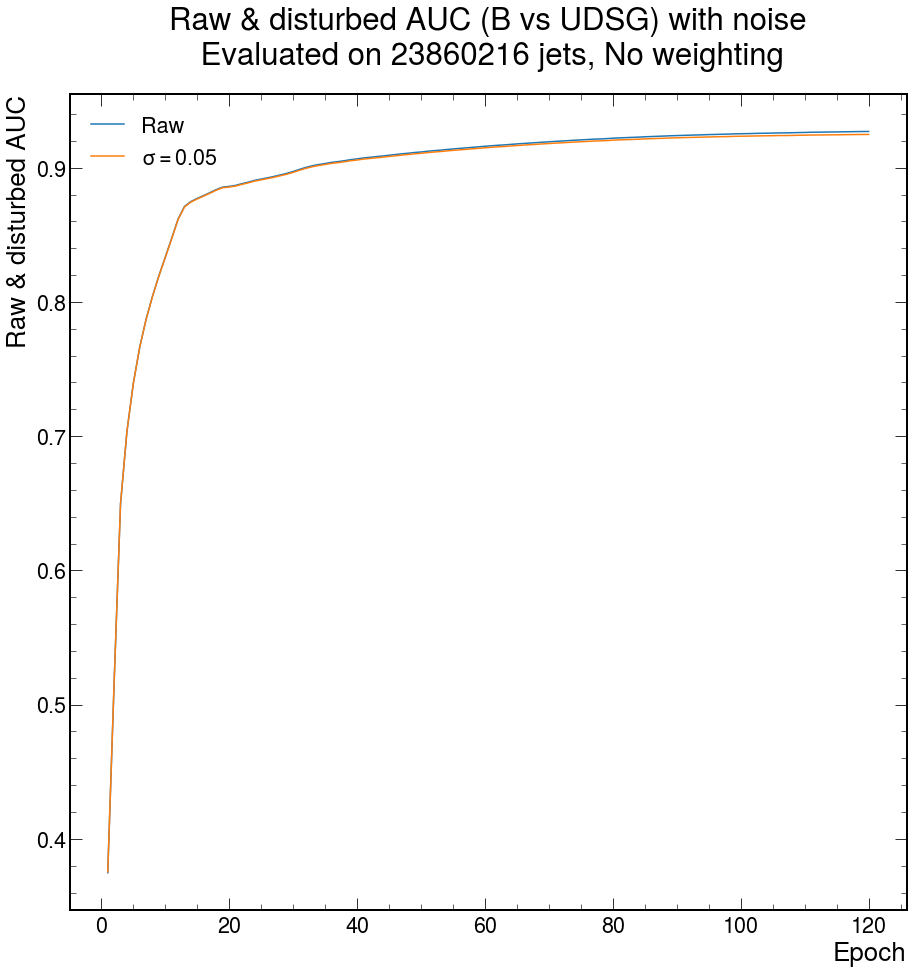

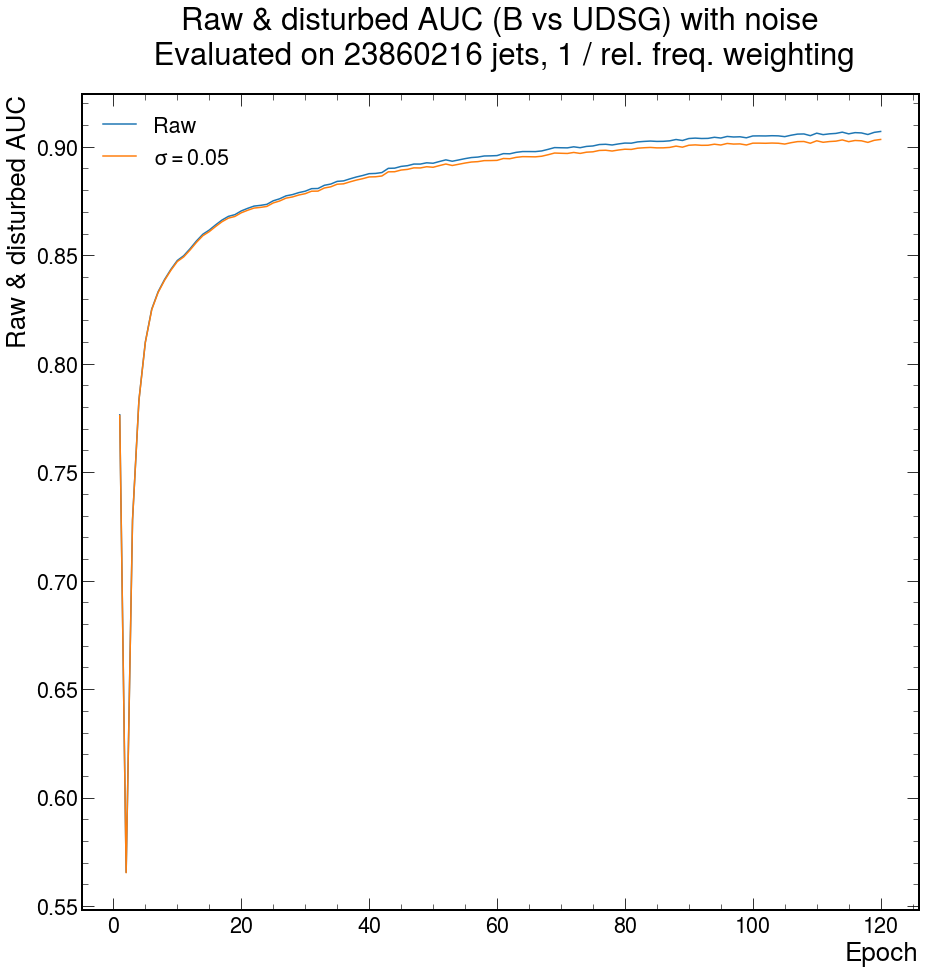

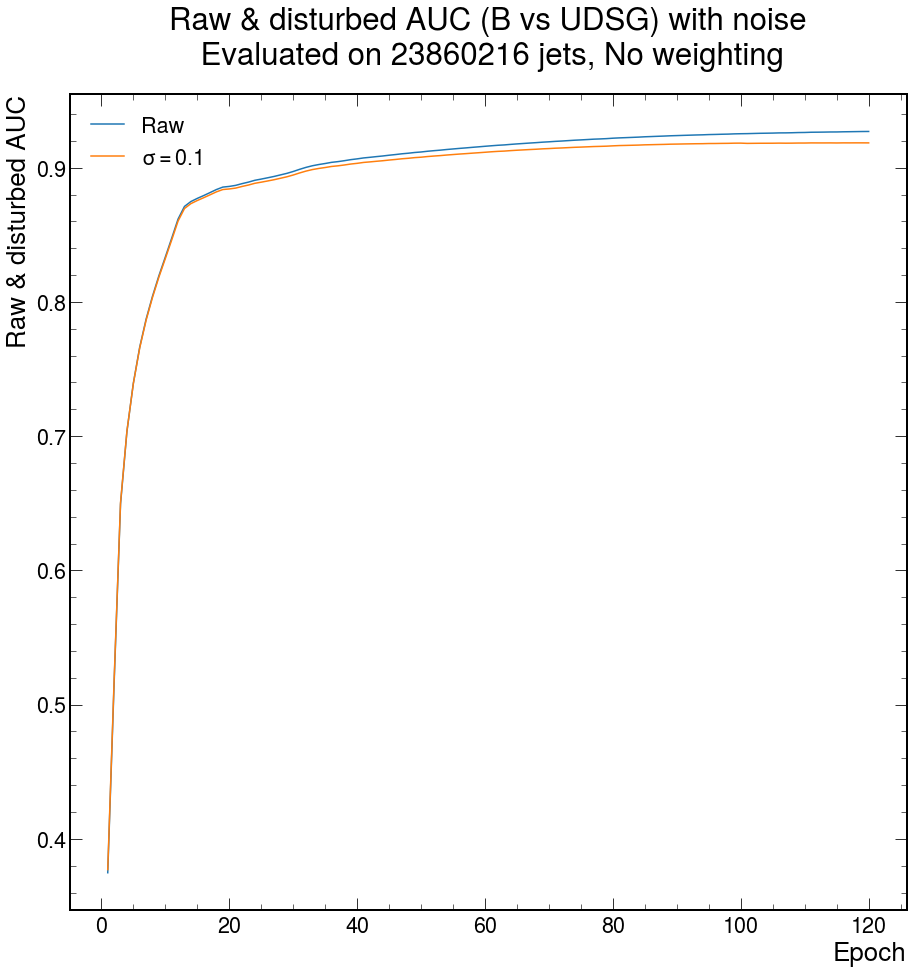

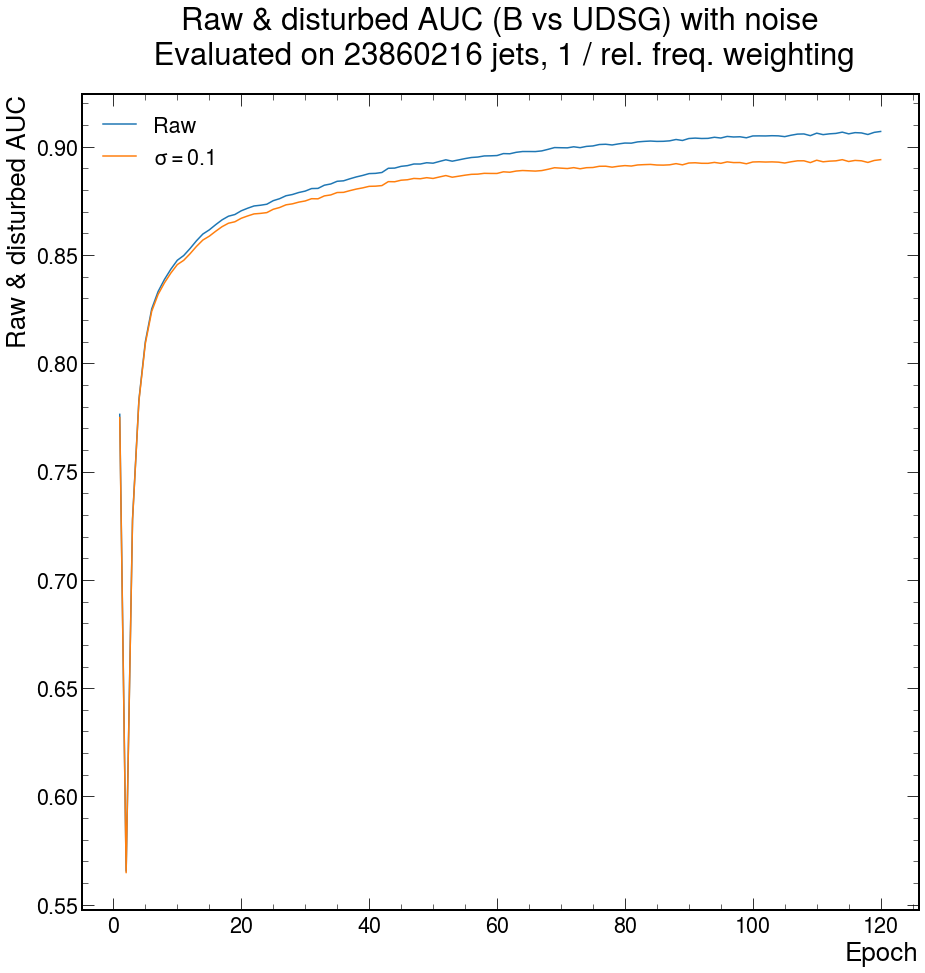

In [95]:
for i, s in enumerate(sigmas):
    for method in [0,2]:
        plt.figure(5,[15,15])
        plt.xlabel('Epoch')
        plt.ylabel('Raw & disturbed AUC')
        if method == 0:
            plt.title(f'Raw & disturbed AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
            plt.plot(at_epoch,auc0_raw,label='Raw')
            if s == 0.05:
                plt.plot(at_epoch,auc0_noise_005,label=f'$\sigma={s}$')
            else:
                plt.plot(at_epoch,auc0_noise_01,label=f'$\sigma={s}$')
        else:
            plt.title(f'Raw & disturbed AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
            plt.plot(at_epoch,auc2_raw,label='Raw')
            if s == 0.05:
                plt.plot(at_epoch,auc2_noise_005,label=f'$\sigma={s}$')
            else:
                plt.plot(at_epoch,auc2_noise_01,label=f'$\sigma={s}$')
        
        plt.legend()
        sigm = str(s).replace('.','')
        if method == 0:
            plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_noise_{sigm}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
        else:
            plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_noise_{sigm}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
        plt.show(block=False)
        time.sleep(5)
        plt.close('all')
        gc.collect(2)

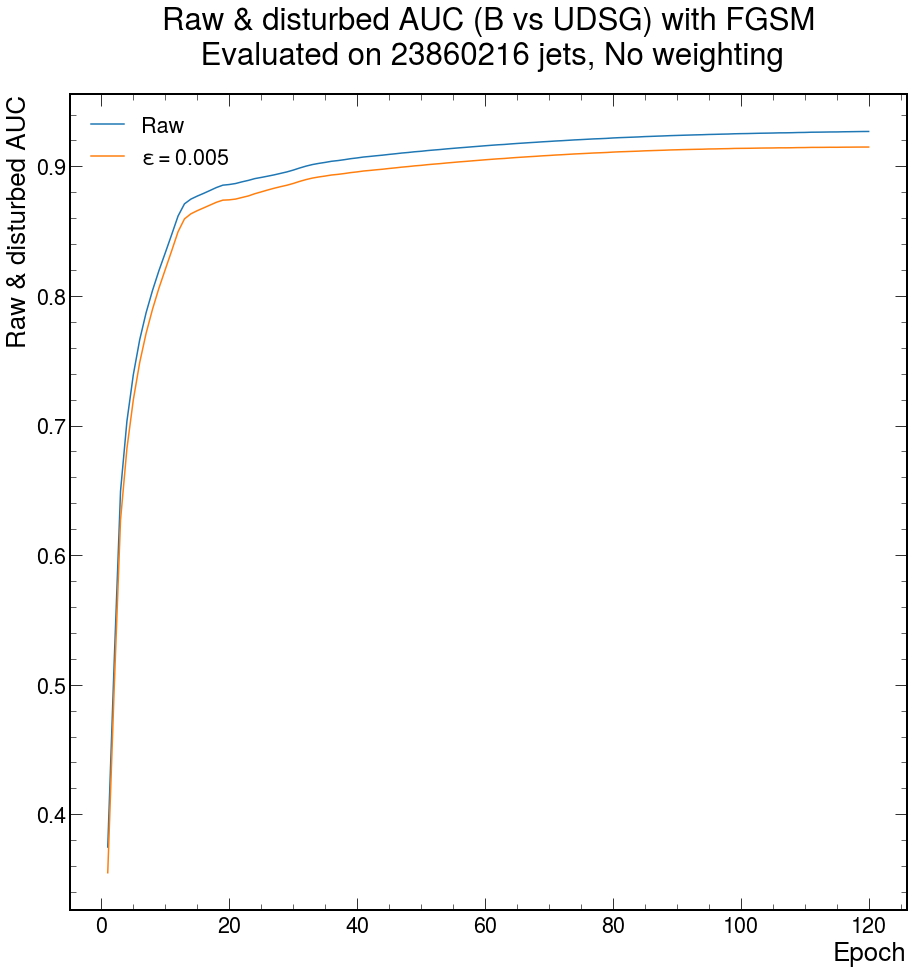

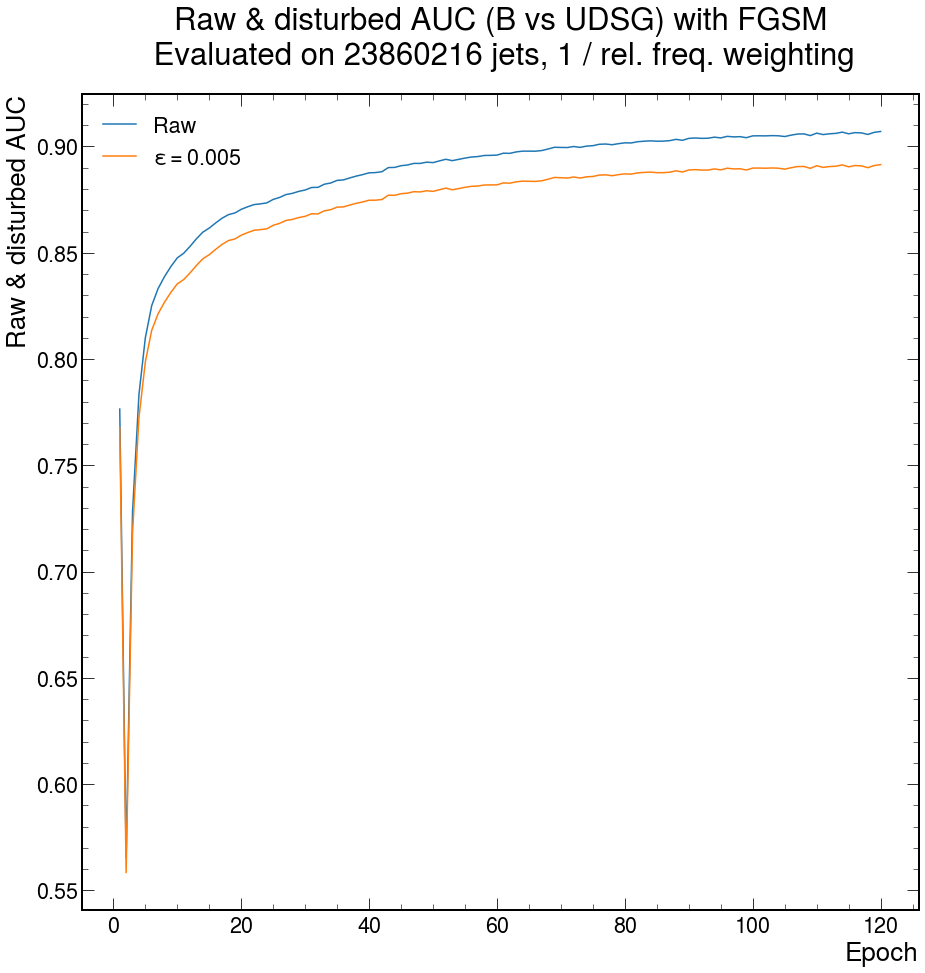

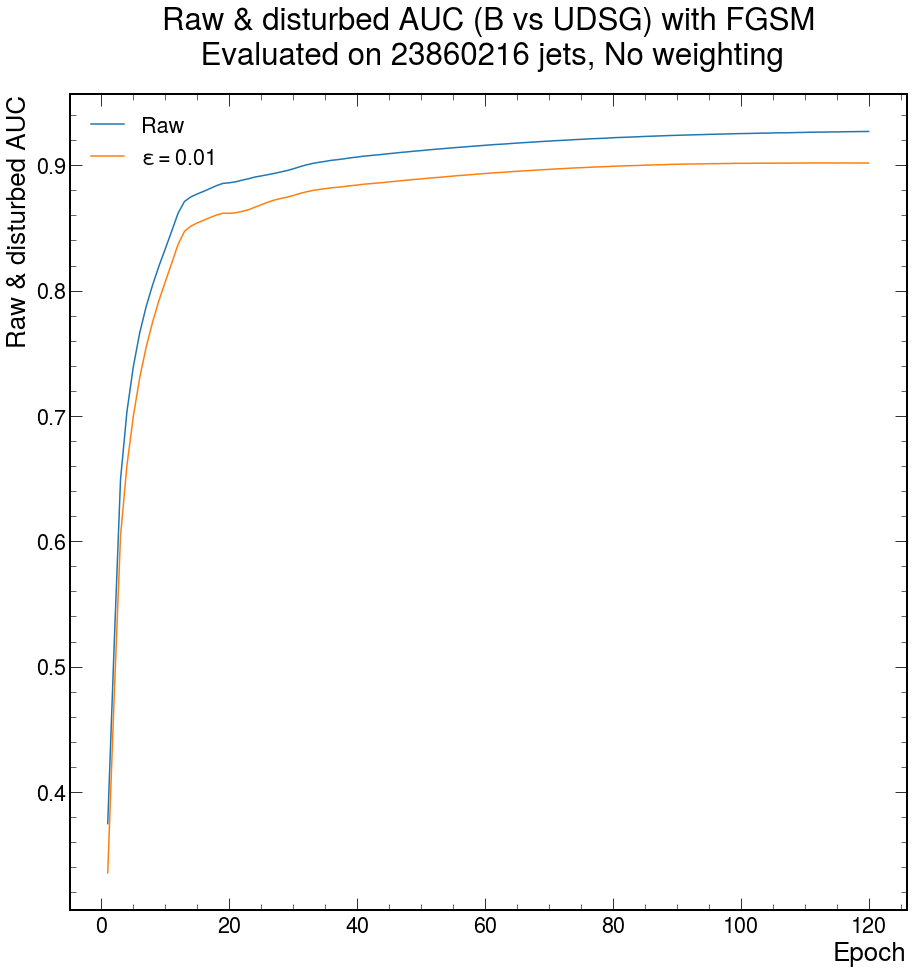

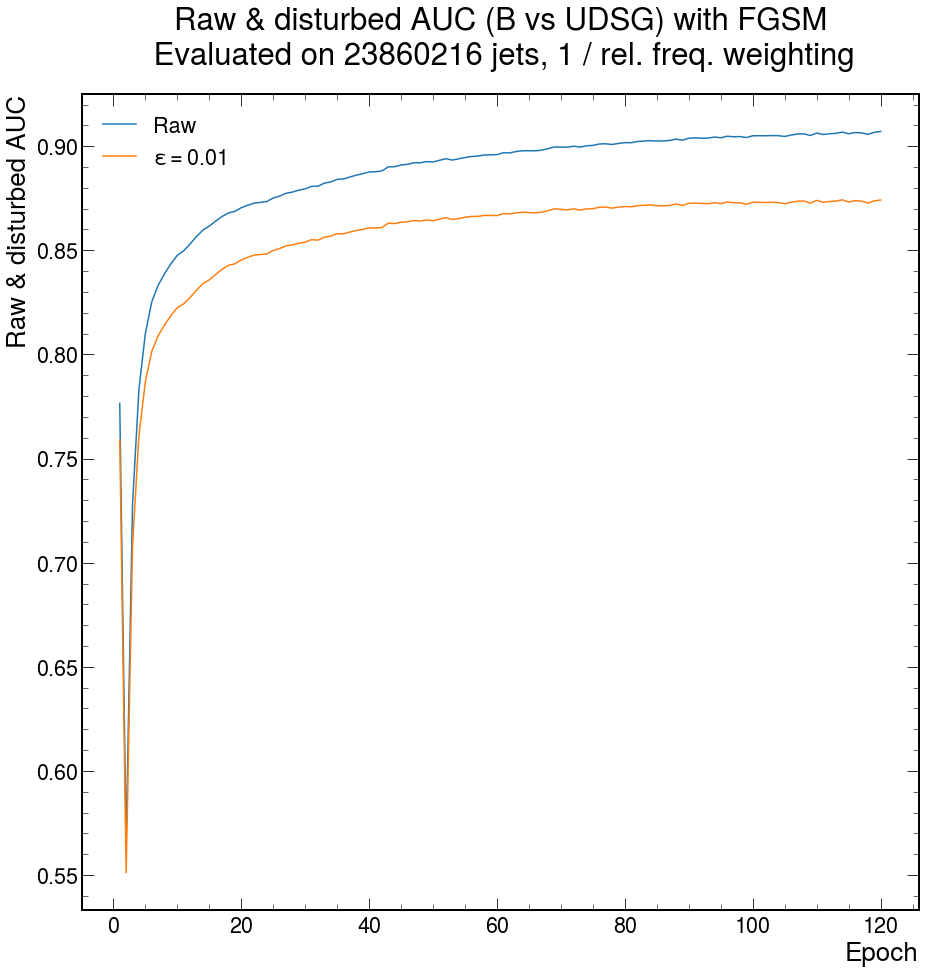

In [99]:
for i, e in enumerate(epsilons):
    for method in [0,2]:
        plt.figure(5,[15,15])
        plt.xlabel('Epoch')
        plt.ylabel('Raw & disturbed AUC')
        if method == 0:
            plt.title(f'Raw & disturbed AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
            plt.plot(at_epoch,auc0_raw,label='Raw')
            if e == 0.005:
                plt.plot(at_epoch,auc0_fgsm_0005,label=f'$\epsilon={e}$')
            else:
                plt.plot(at_epoch,auc0_fgsm_001,label=f'$\epsilon={e}$')
        else:
            plt.title(f'Raw & disturbed AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
            plt.plot(at_epoch,auc2_raw,label='Raw')
            if e == 0.005:
                plt.plot(at_epoch,auc2_fgsm_0005,label=f'$\epsilon={e}$')
            else:
                plt.plot(at_epoch,auc2_fgsm_001,label=f'$\epsilon={e}$')
        
        
        plt.legend()
        epsi = str(e).replace('.','')
        if method == 0:
            plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_fgsm_{epsi}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
        else:
            plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_fgsm_{epsi}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
        plt.show(block=False)
        time.sleep(5)
        plt.close('all')
        gc.collect(2)

### Build differences, ratio, rel. diff. per epoch

#### Noise

In [79]:
auc0_noise_diff = []
auc2_noise_diff = []
auc0_noise_diff_rel = []
auc2_noise_diff_rel = []
auc0_noise_rel = []
auc2_noise_rel = []

In [80]:
# Noise 0.05
auc0_noise_diff.append([auc0_noise_005[ep] - auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_diff.append([auc2_noise_005[ep] - auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_noise_diff_rel.append([-(auc0_noise_005[ep] - auc0_raw[ep]) / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_diff_rel.append([-(auc2_noise_005[ep] - auc2_raw[ep]) / auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_noise_rel.append([auc0_noise_005[ep] / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_rel.append([auc2_noise_005[ep] / auc2_raw[ep] for ep in range(len(auc0_raw))])

In [81]:
# Noise 0.1
auc0_noise_diff.append([auc0_noise_01[ep] - auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_diff.append([auc2_noise_01[ep] - auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_noise_diff_rel.append([-(auc0_noise_01[ep] - auc0_raw[ep]) / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_diff_rel.append([-(auc2_noise_01[ep] - auc2_raw[ep]) / auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_noise_rel.append([auc0_noise_01[ep] / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_noise_rel.append([auc2_noise_01[ep] / auc2_raw[ep] for ep in range(len(auc0_raw))])

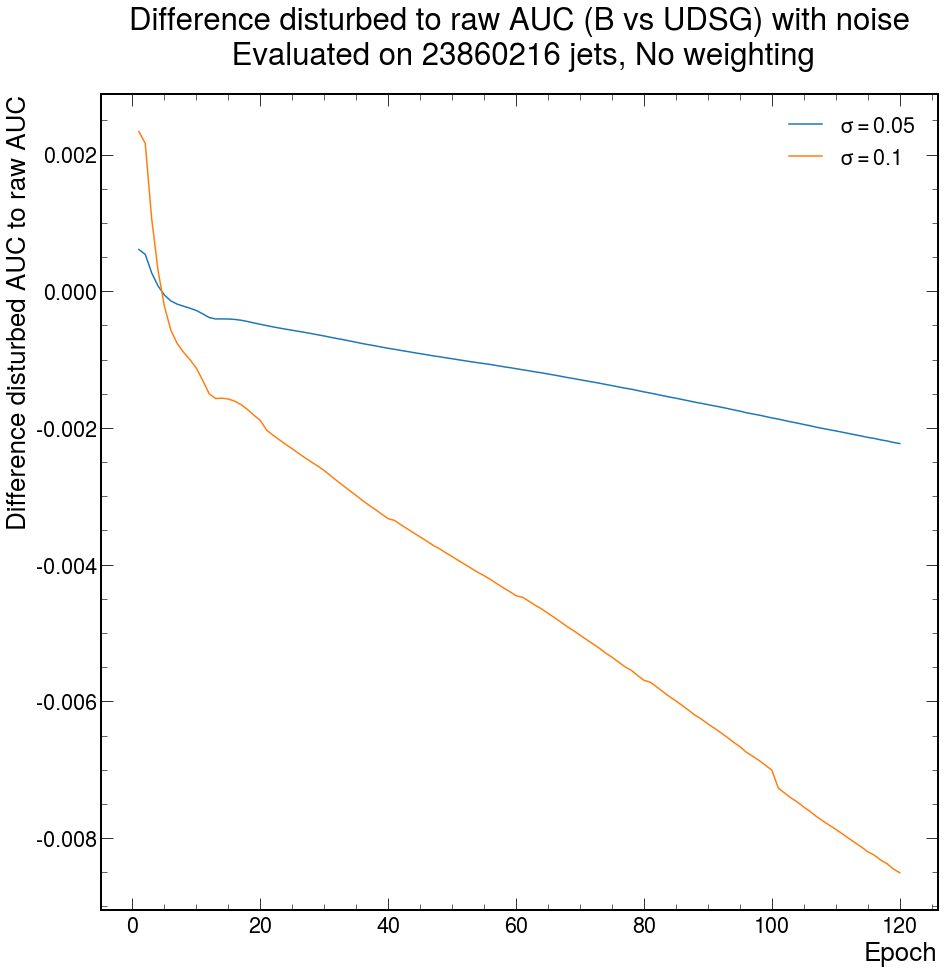

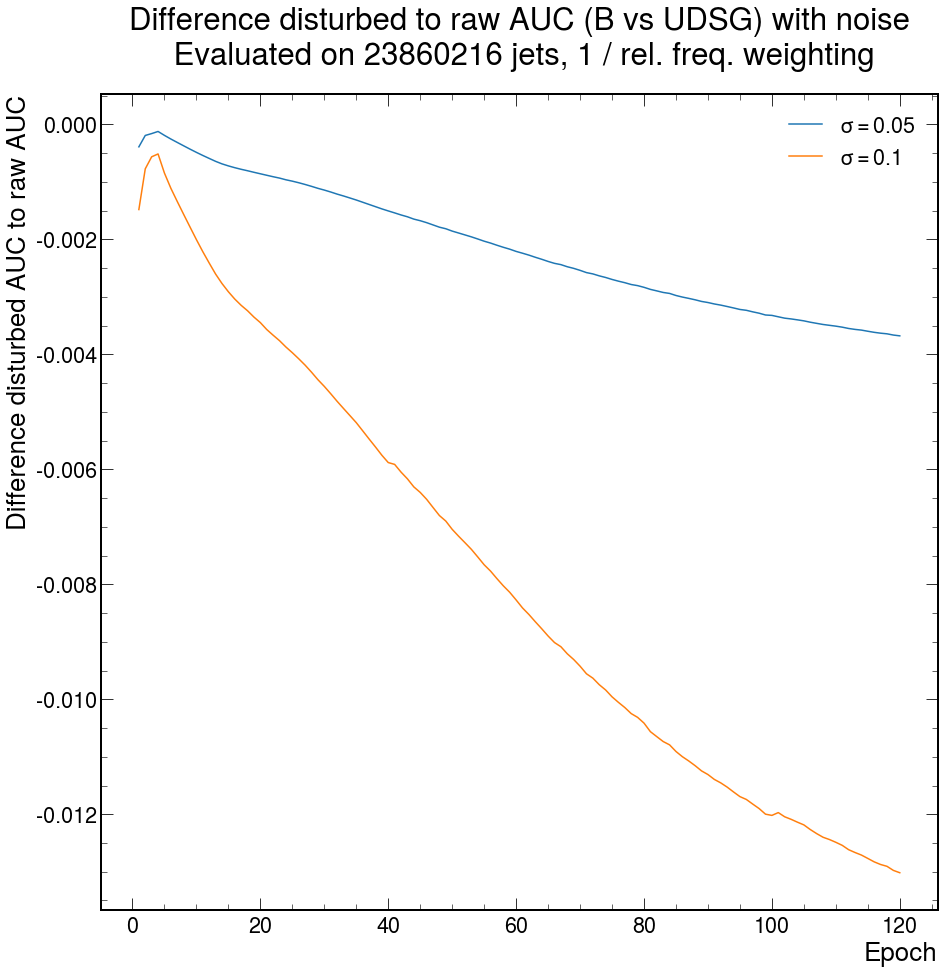

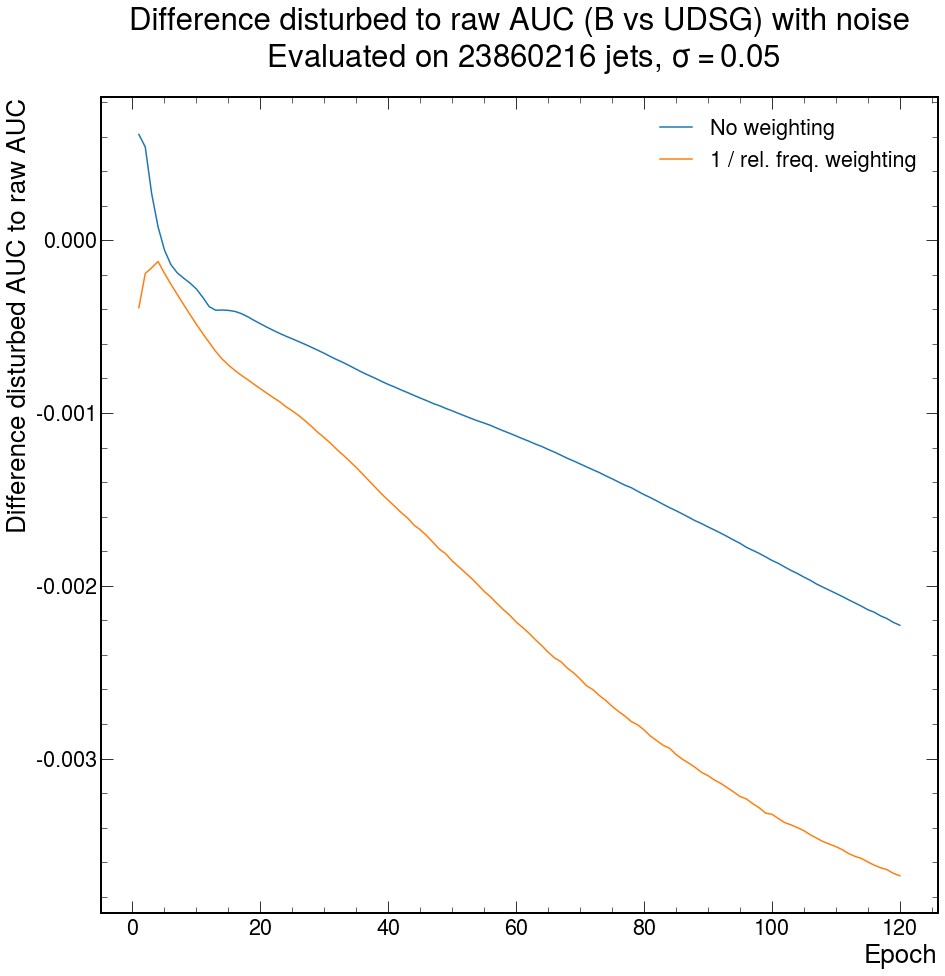

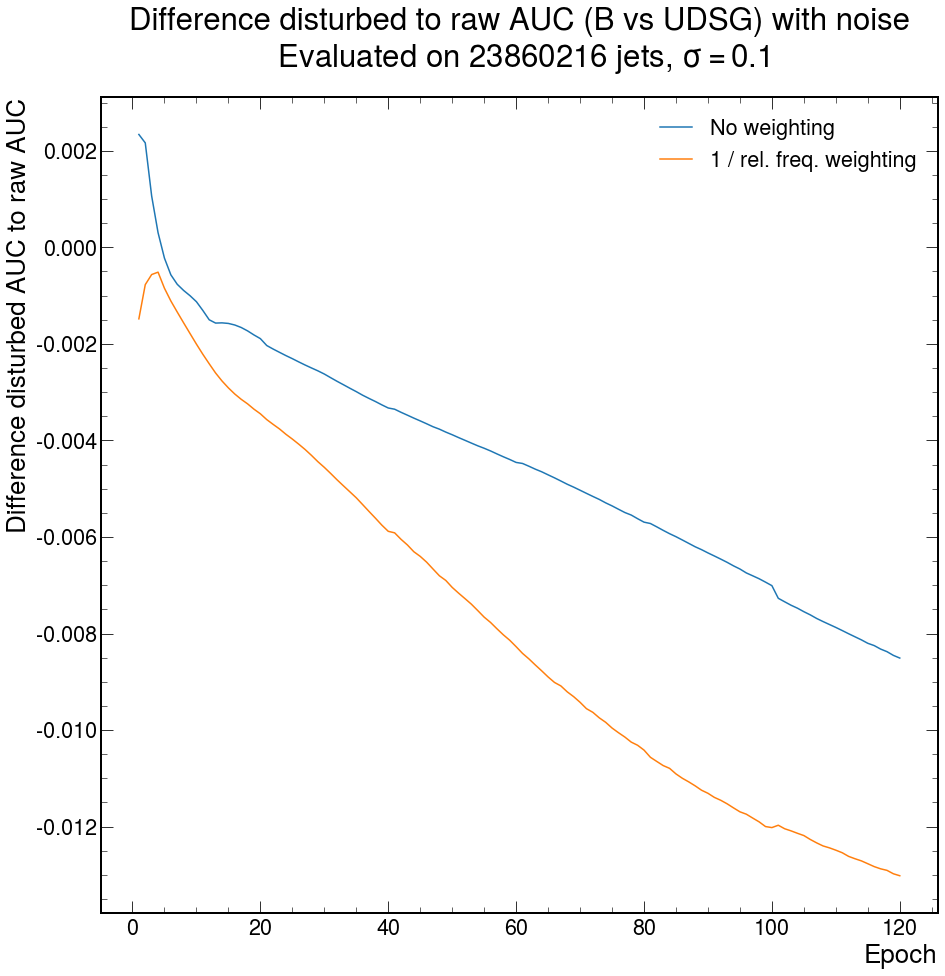

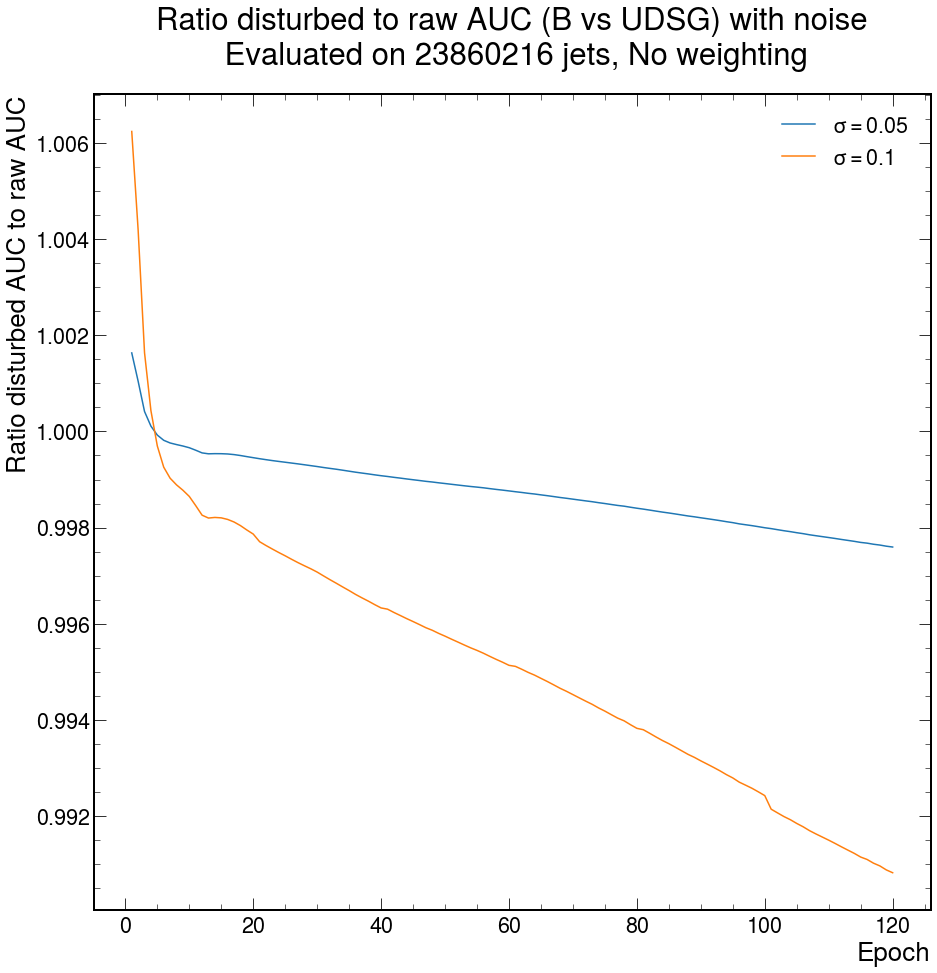

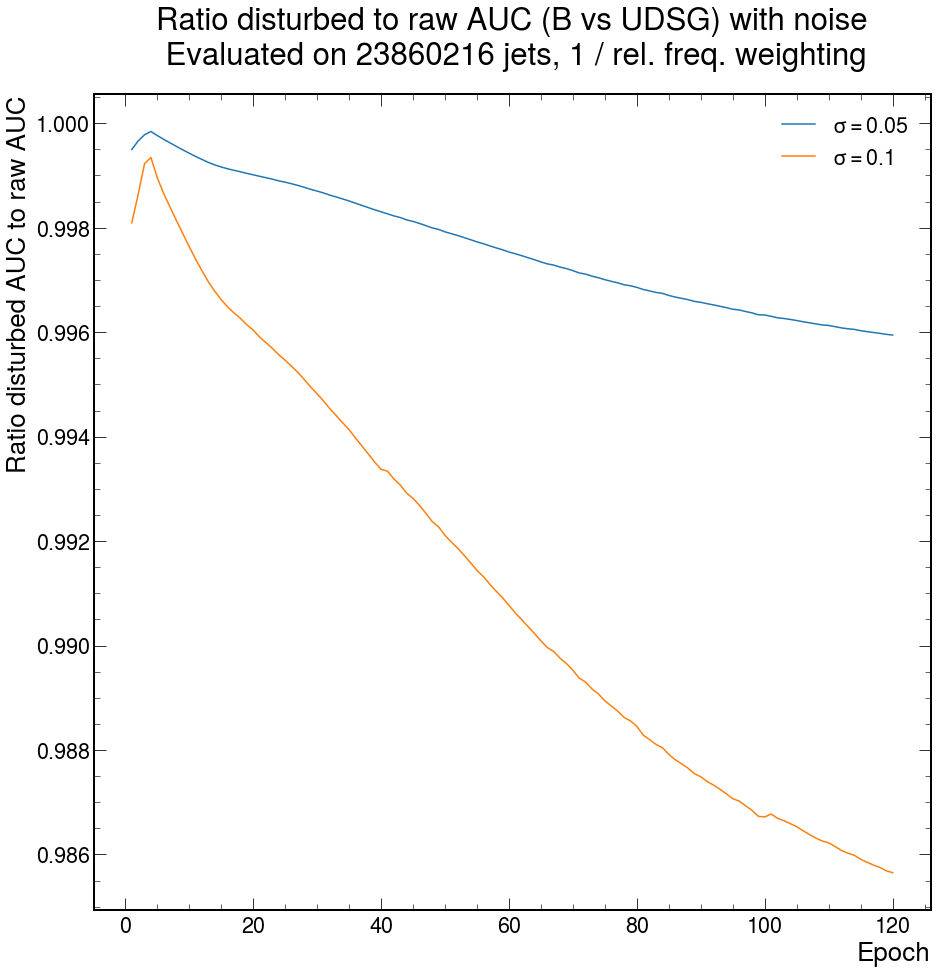

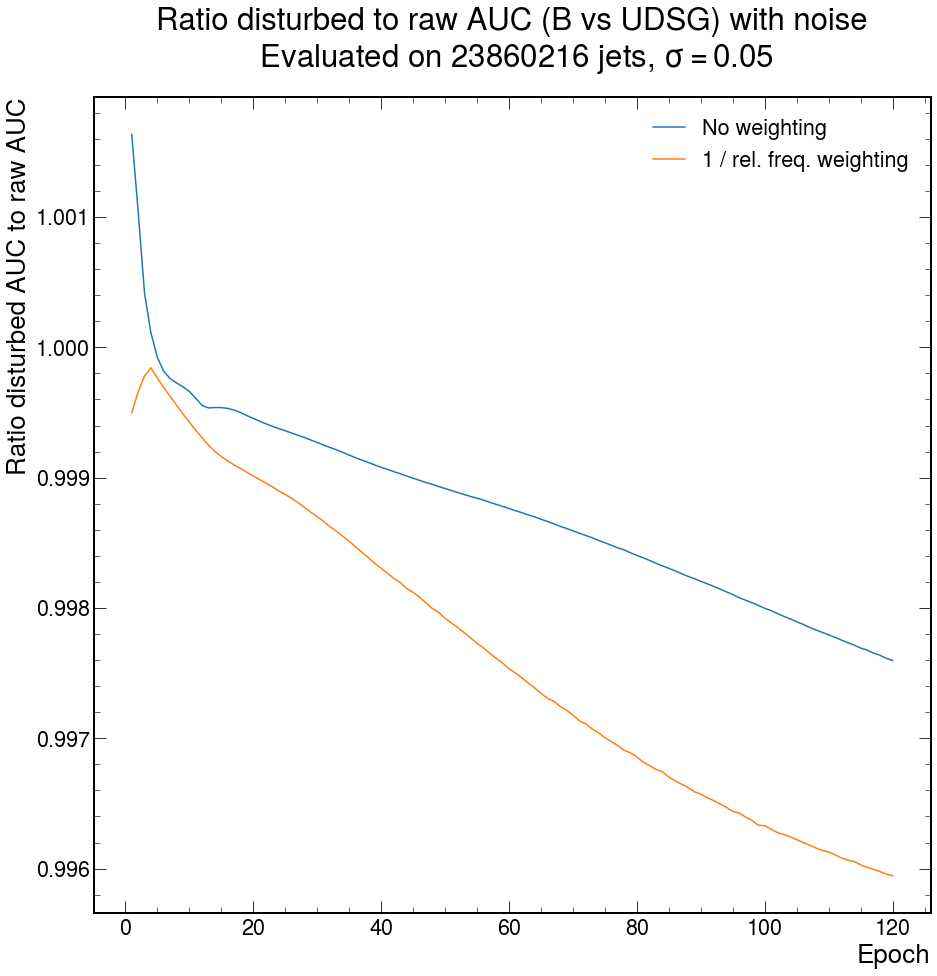

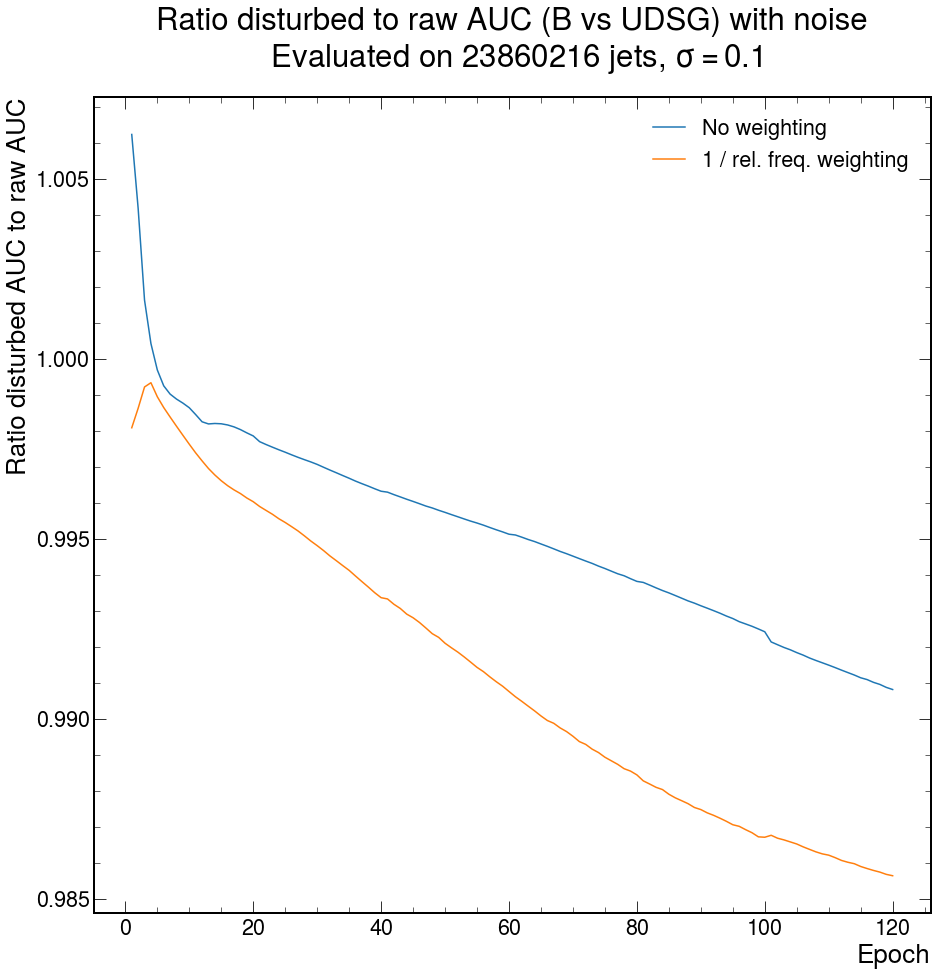

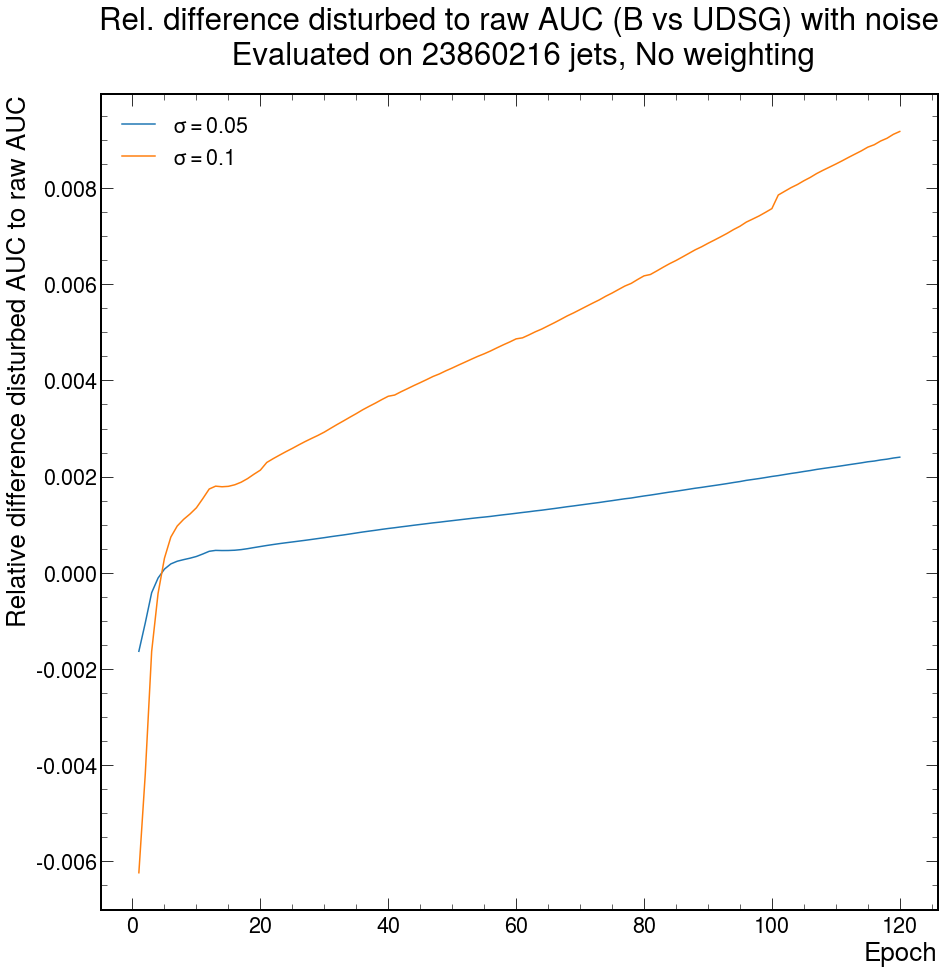

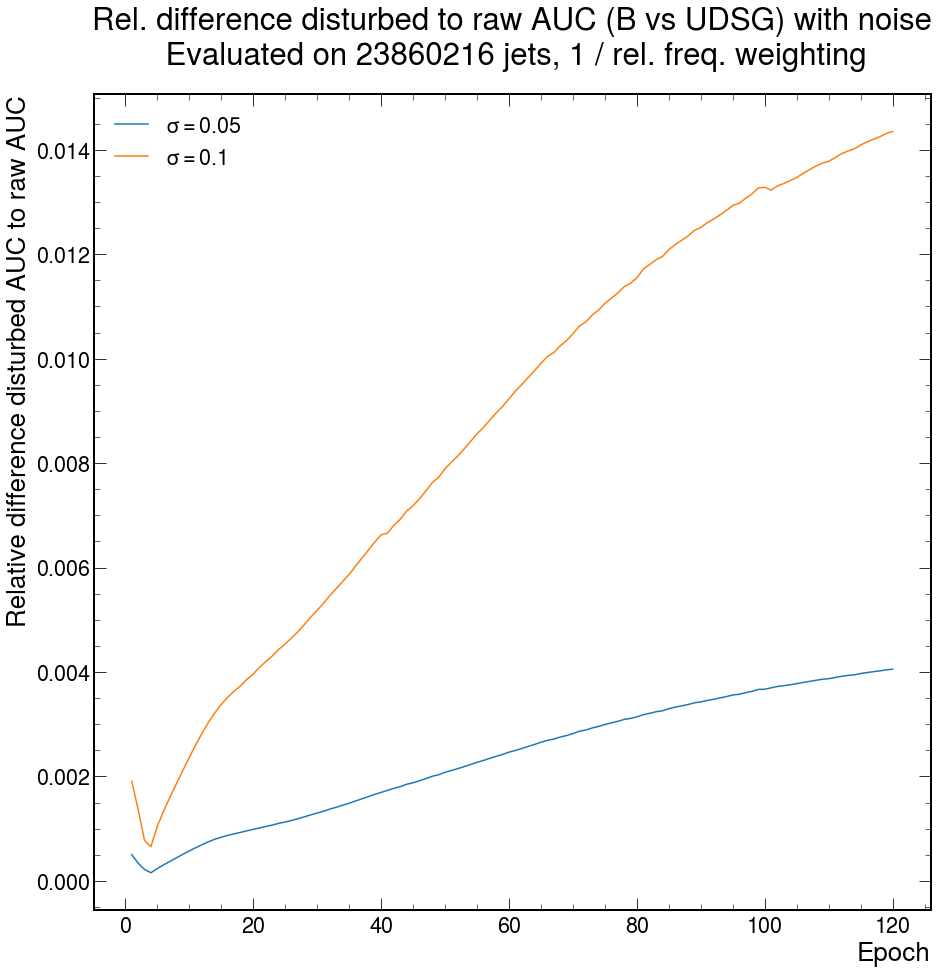

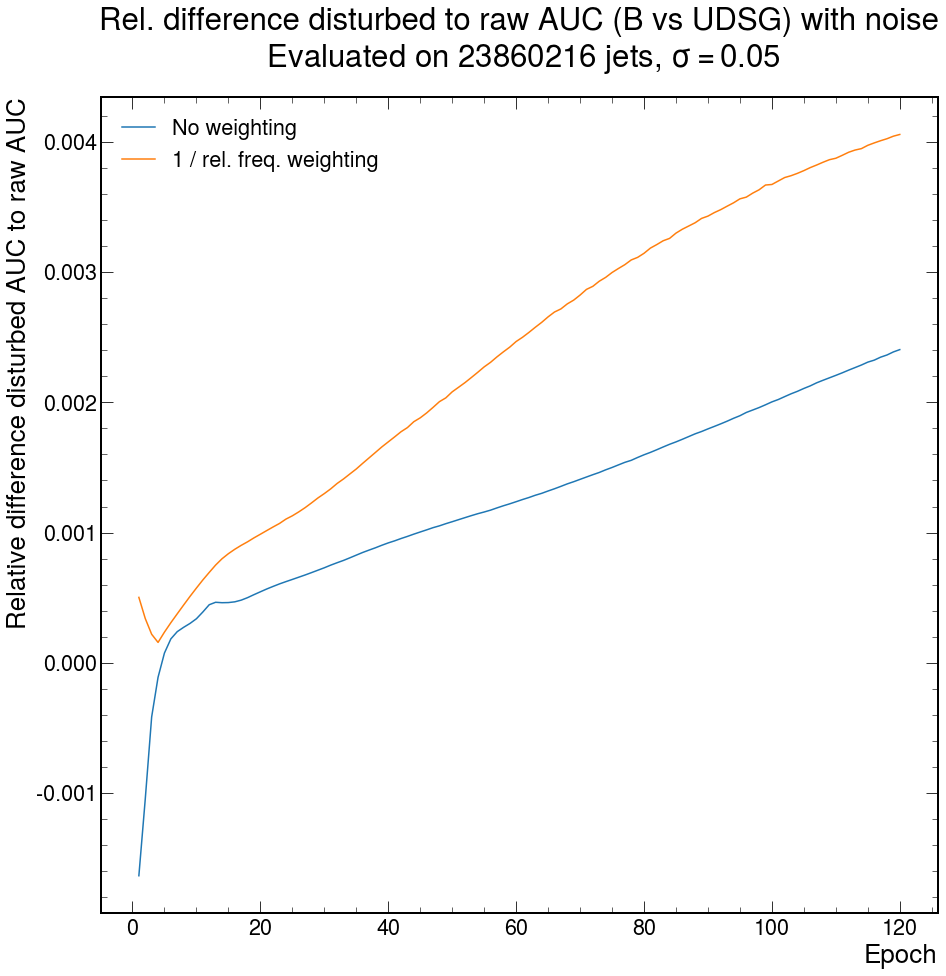

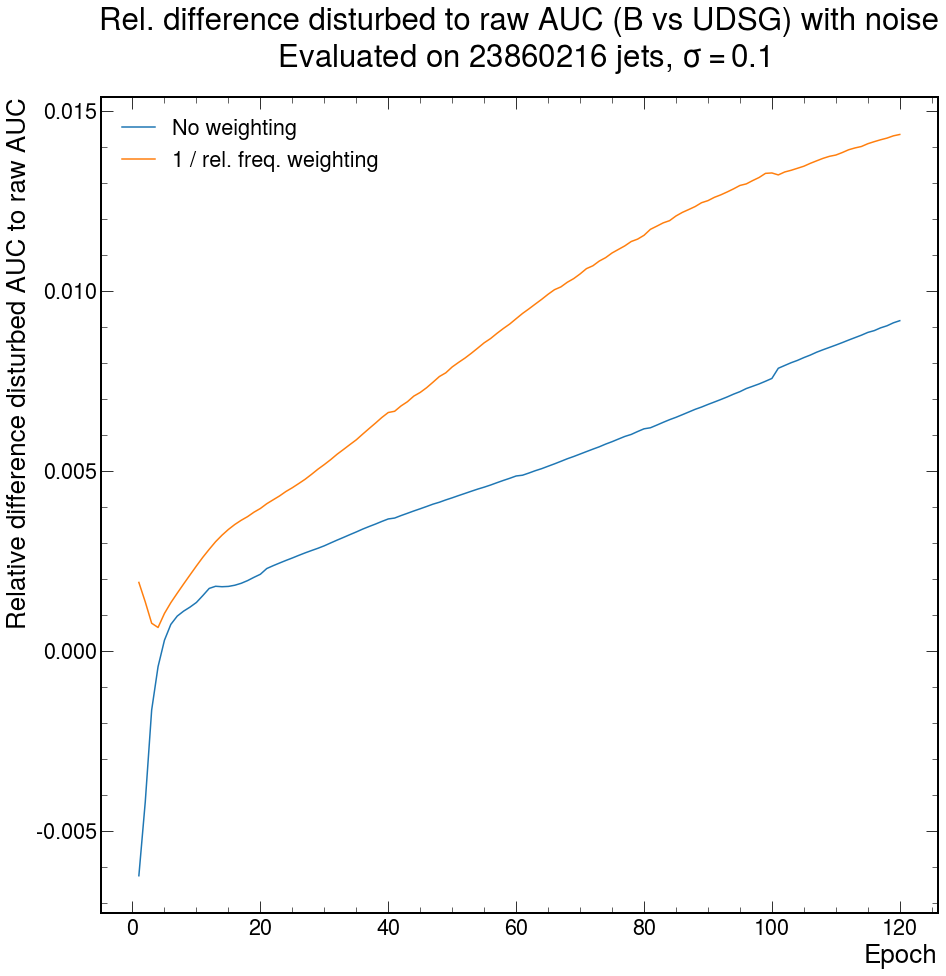

In [83]:
# Noise

# Diff.
# per method alone
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Difference disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, s in enumerate(sigmas):
        if method == 0:
            plt.plot(at_epoch,auc0_noise_diff[i],label=f'$\sigma={s}$')
        else:
            plt.plot(at_epoch,auc2_noise_diff[i],label=f'$\sigma={s}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_diff_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_diff_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

# both methods on one plot
for i, s in enumerate(sigmas):
    sigm = str(s).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Difference disturbed AUC to raw AUC')
    plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, $\sigma={s}$',y=1.03)
    
    plt.plot(at_epoch,auc0_noise_diff[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_noise_diff[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_diff_noise_{sigm}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

# Ratio
# per method alone    
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Ratio disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, s in enumerate(sigmas):
        if method == 0:
            plt.plot(at_epoch,auc0_noise_rel[i],label=f'$\sigma={s}$')
        else:
            plt.plot(at_epoch,auc2_noise_rel[i],label=f'$\sigma={s}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_ratio_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_ratio_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)    

# both methods on one plot
for i, s in enumerate(sigmas):
    sigm = str(s).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Ratio disturbed AUC to raw AUC')
    plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, $\sigma={s}$',y=1.03)
    
    plt.plot(at_epoch,auc0_noise_rel[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_noise_rel[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_ratio_noise_{sigm}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)
    
# Rel. diff.
# per method alone    
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Relative difference disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, s in enumerate(sigmas):
        if method == 0:
            plt.plot(at_epoch,auc0_noise_diff_rel[i],label=f'$\sigma={s}$')
        else:
            plt.plot(at_epoch,auc2_noise_diff_rel[i],label=f'$\sigma={s}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_diff_rel_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_diff_rel_noise_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)  
    
# both methods on one plot
for i, s in enumerate(sigmas):
    sigm = str(s).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Relative difference disturbed AUC to raw AUC')
    plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with noise\n Evaluated on {int(np.sum(length_data_test))} jets, $\sigma={s}$',y=1.03)
    
    plt.plot(at_epoch,auc0_noise_diff_rel[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_noise_diff_rel[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_diff_rel_noise_{sigm}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

#### FGSM

In [85]:
auc0_fgsm_diff = []
auc2_fgsm_diff = []
auc0_fgsm_diff_rel = []
auc2_fgsm_diff_rel = []
auc0_fgsm_rel = []
auc2_fgsm_rel = []

In [86]:
# FGSM 0.005
auc0_fgsm_diff.append([auc0_fgsm_0005[ep] - auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_diff.append([auc2_fgsm_0005[ep] - auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_fgsm_diff_rel.append([-(auc0_fgsm_0005[ep] - auc0_raw[ep]) / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_diff_rel.append([-(auc2_fgsm_0005[ep] - auc2_raw[ep]) / auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_fgsm_rel.append([auc0_fgsm_0005[ep] / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_rel.append([auc2_fgsm_0005[ep] / auc2_raw[ep] for ep in range(len(auc0_raw))])

In [87]:
# FGSM 0.01
auc0_fgsm_diff.append([auc0_fgsm_001[ep] - auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_diff.append([auc2_fgsm_001[ep] - auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_fgsm_diff_rel.append([-(auc0_fgsm_001[ep] - auc0_raw[ep]) / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_diff_rel.append([-(auc2_fgsm_001[ep] - auc2_raw[ep]) / auc2_raw[ep] for ep in range(len(auc0_raw))])
auc0_fgsm_rel.append([auc0_fgsm_001[ep] / auc0_raw[ep] for ep in range(len(auc0_raw))])
auc2_fgsm_rel.append([auc2_fgsm_001[ep] / auc2_raw[ep] for ep in range(len(auc0_raw))])

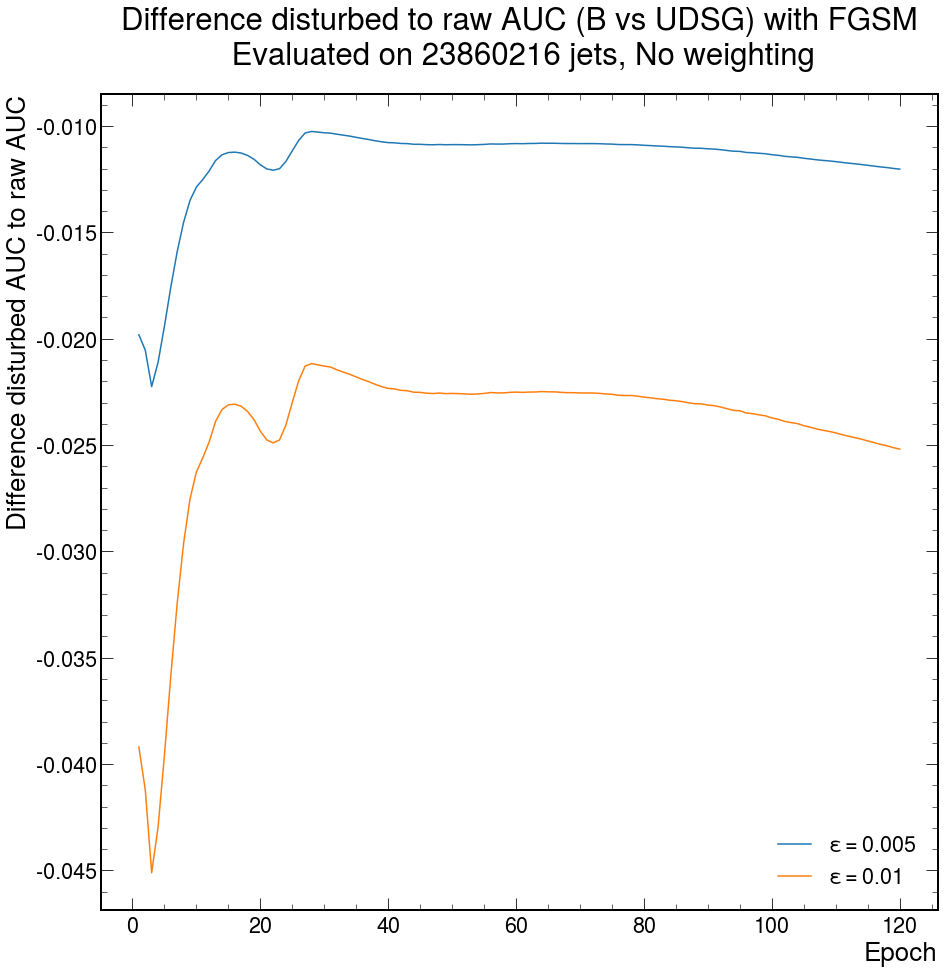

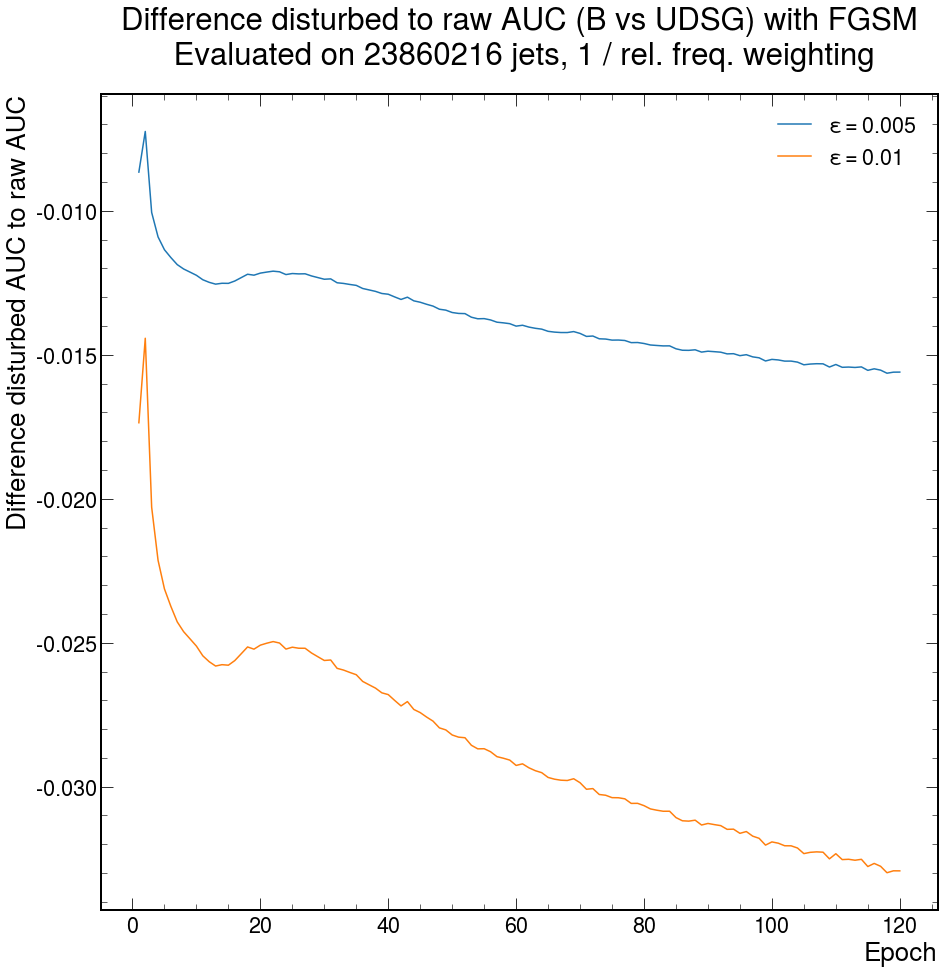

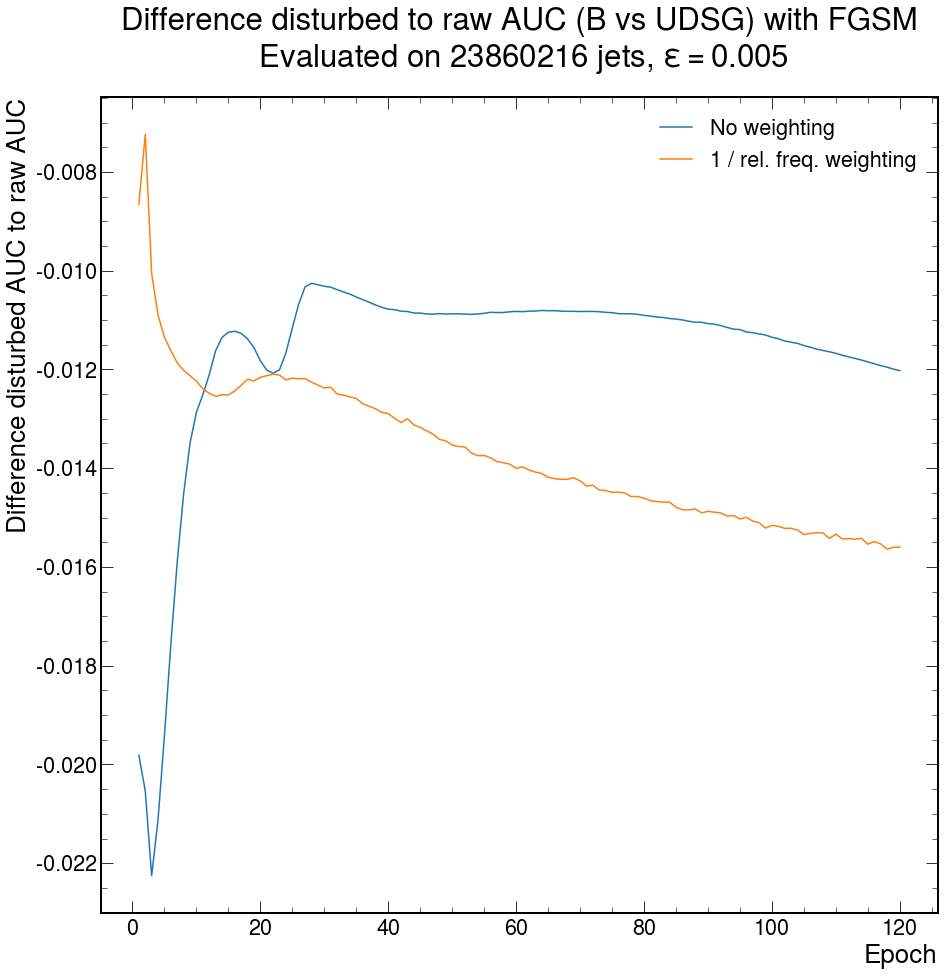

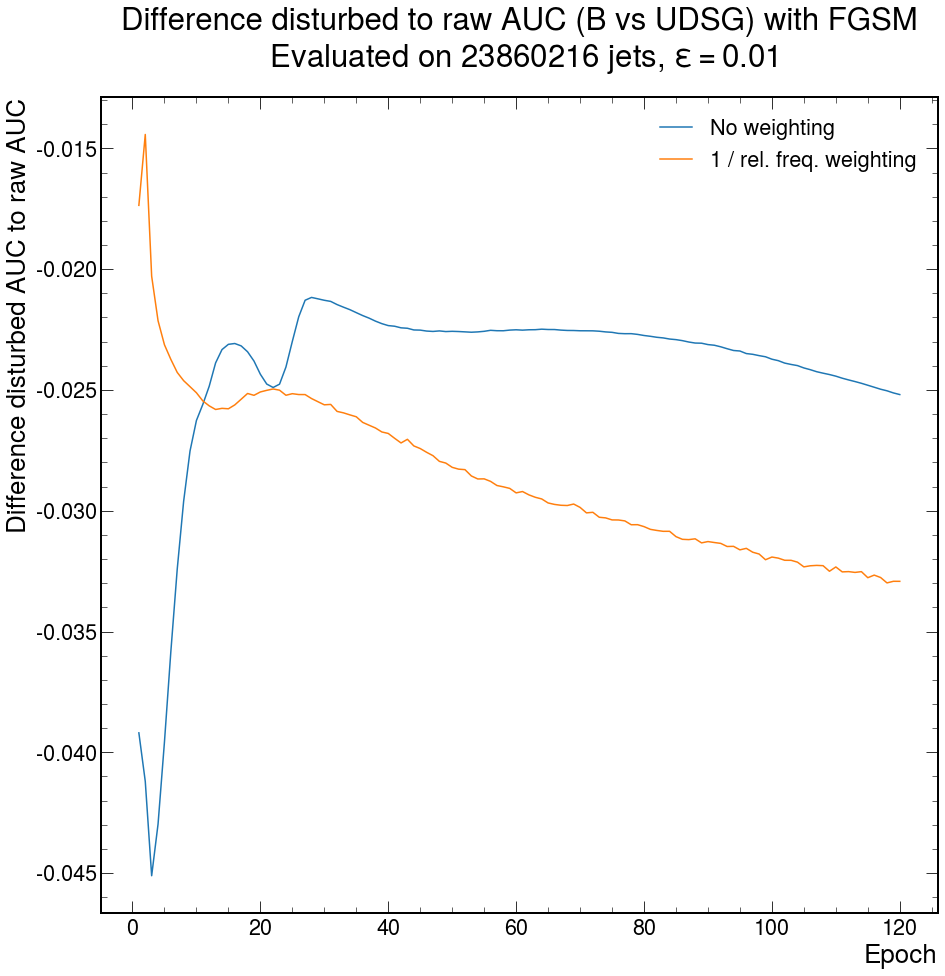

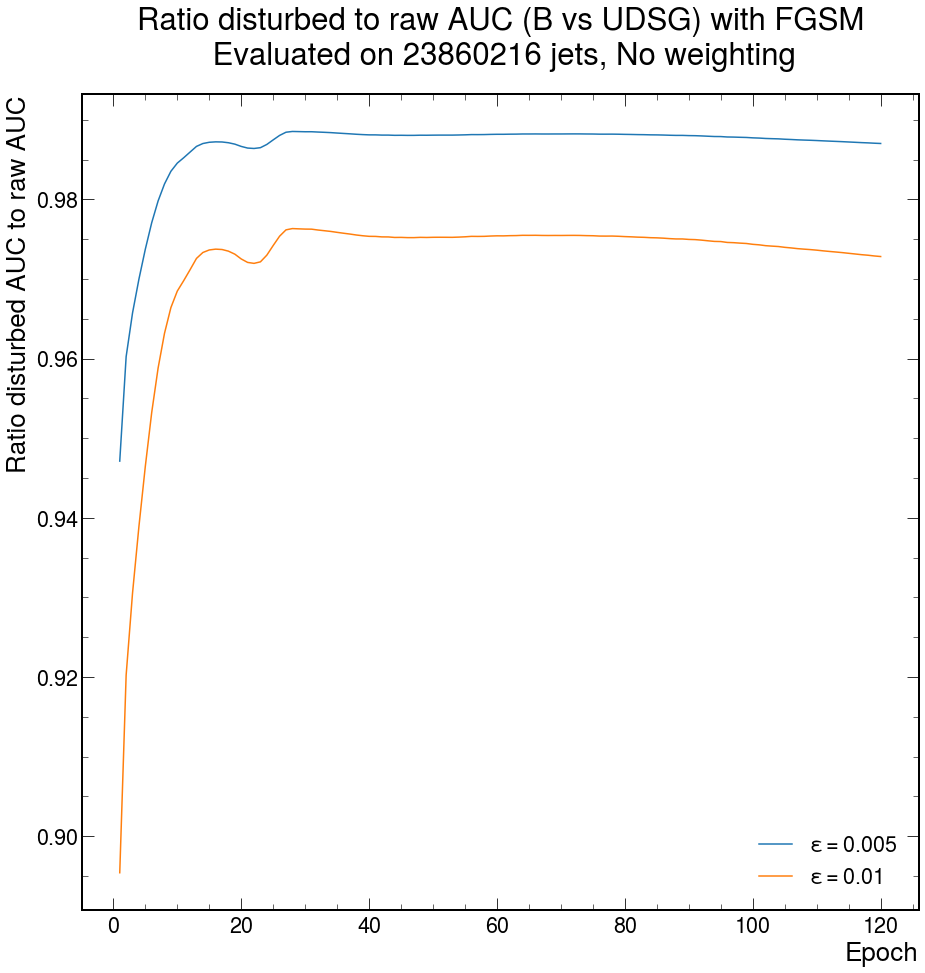

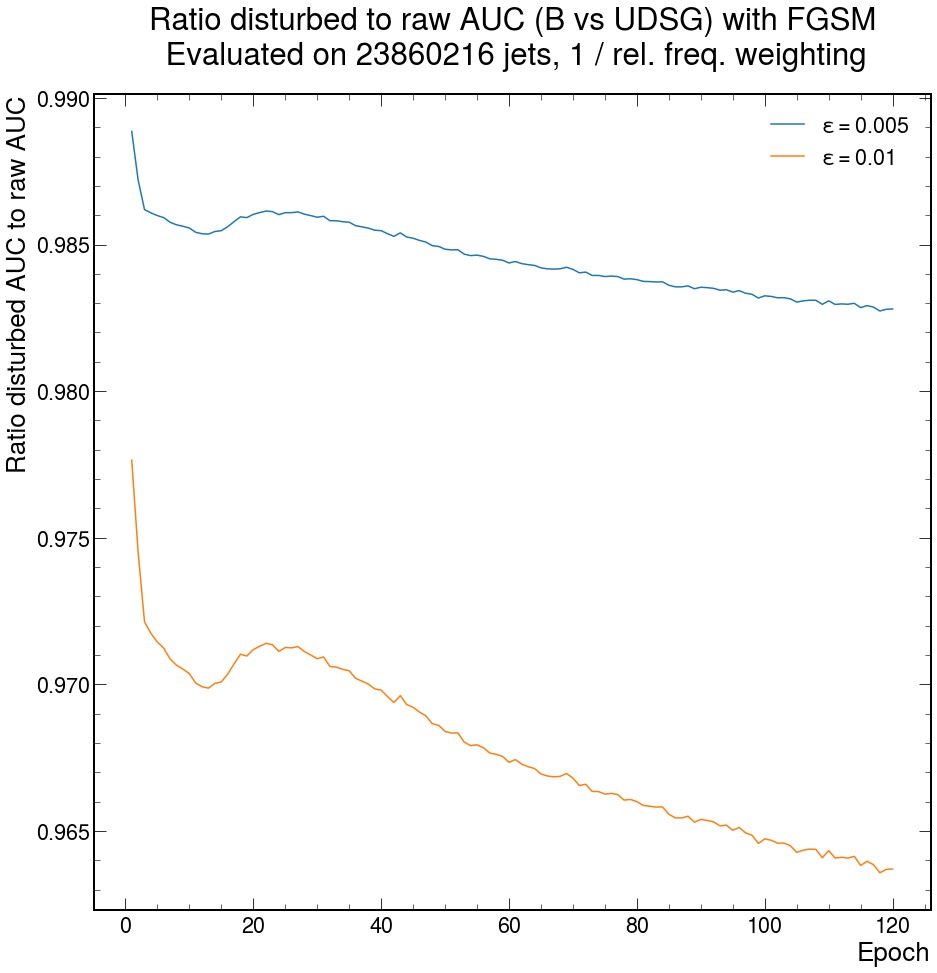

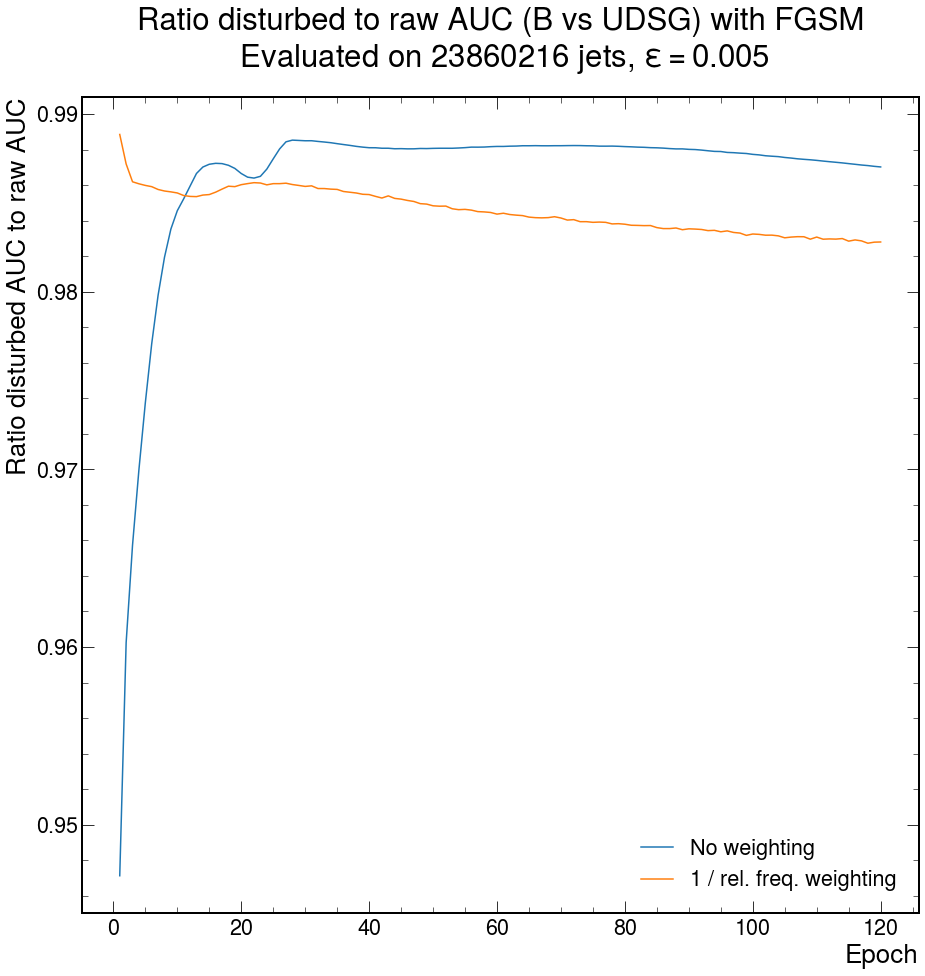

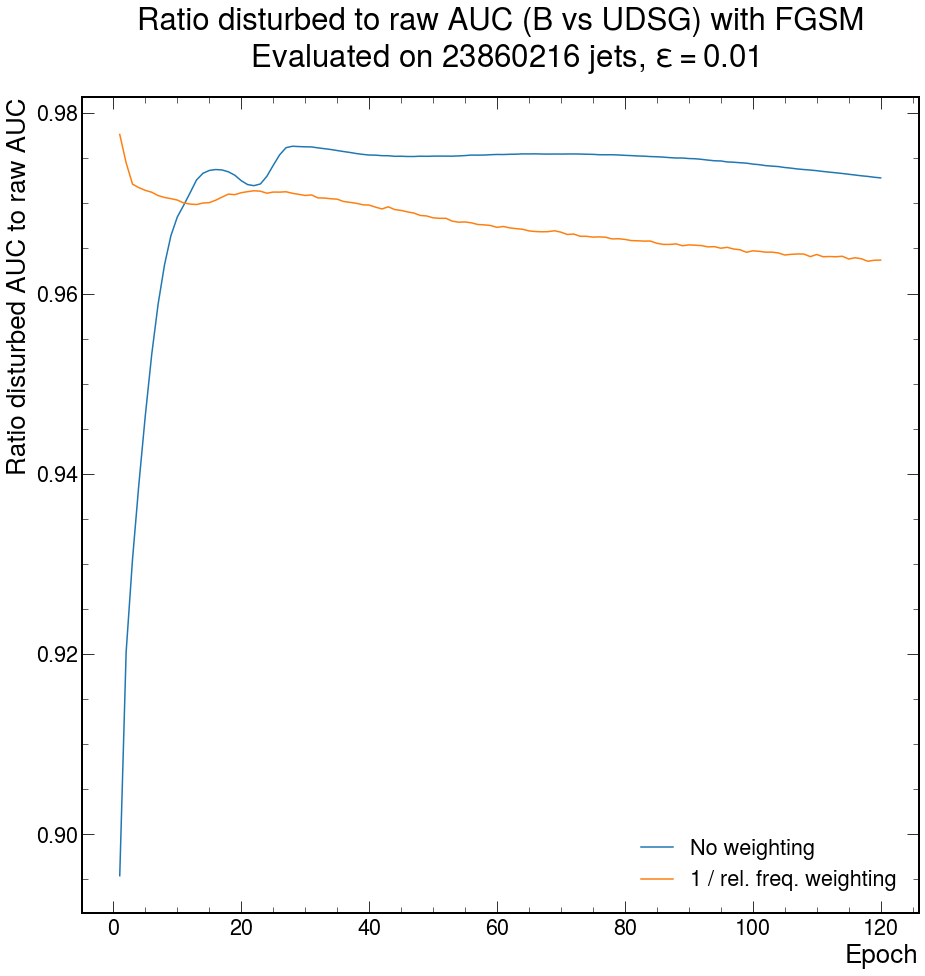

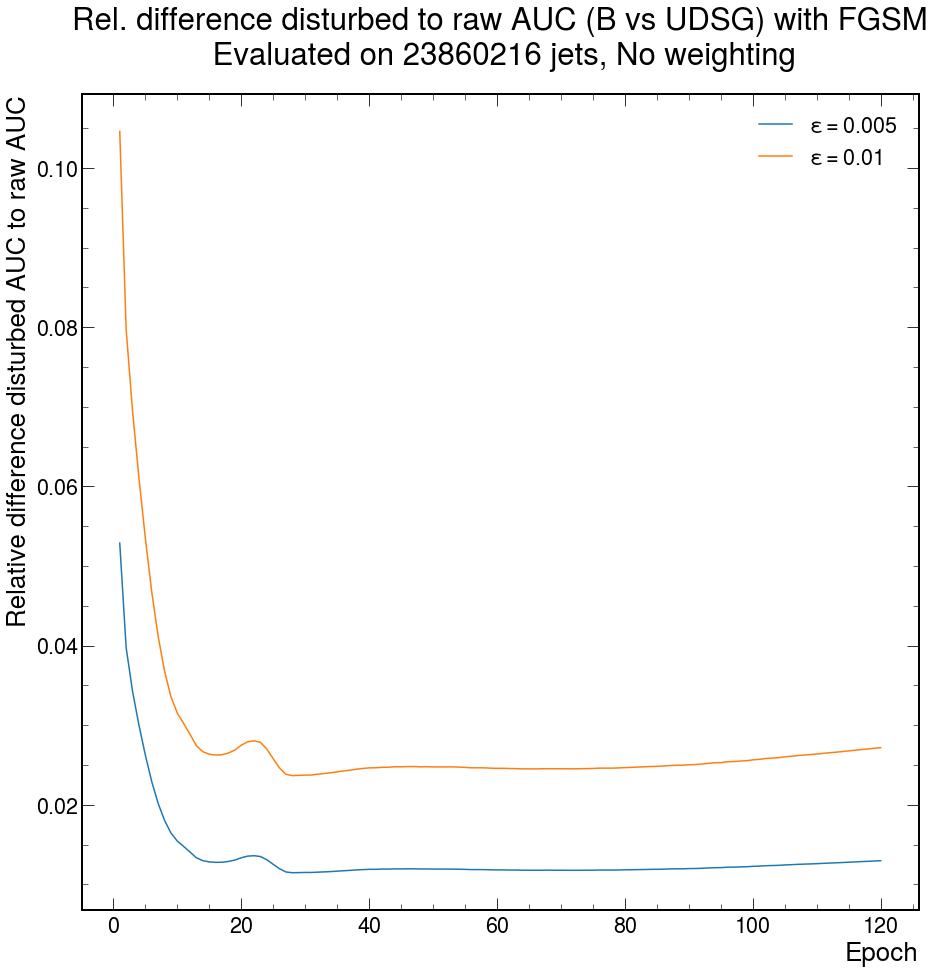

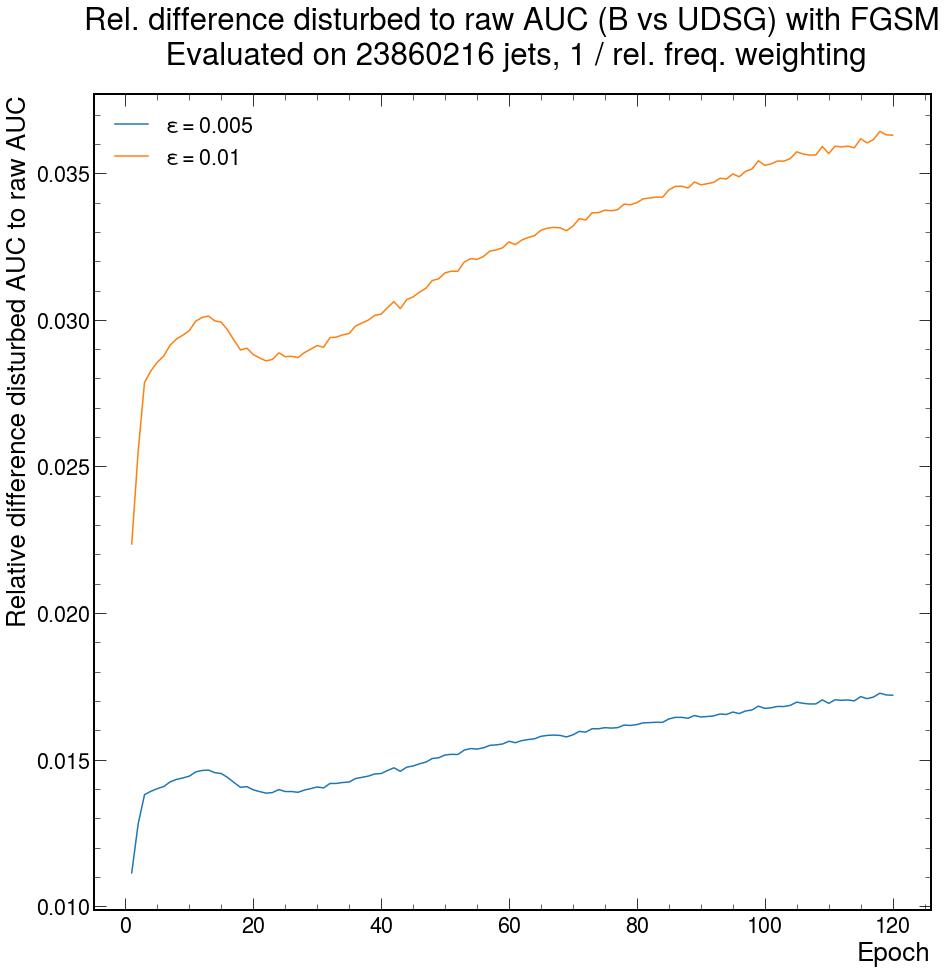

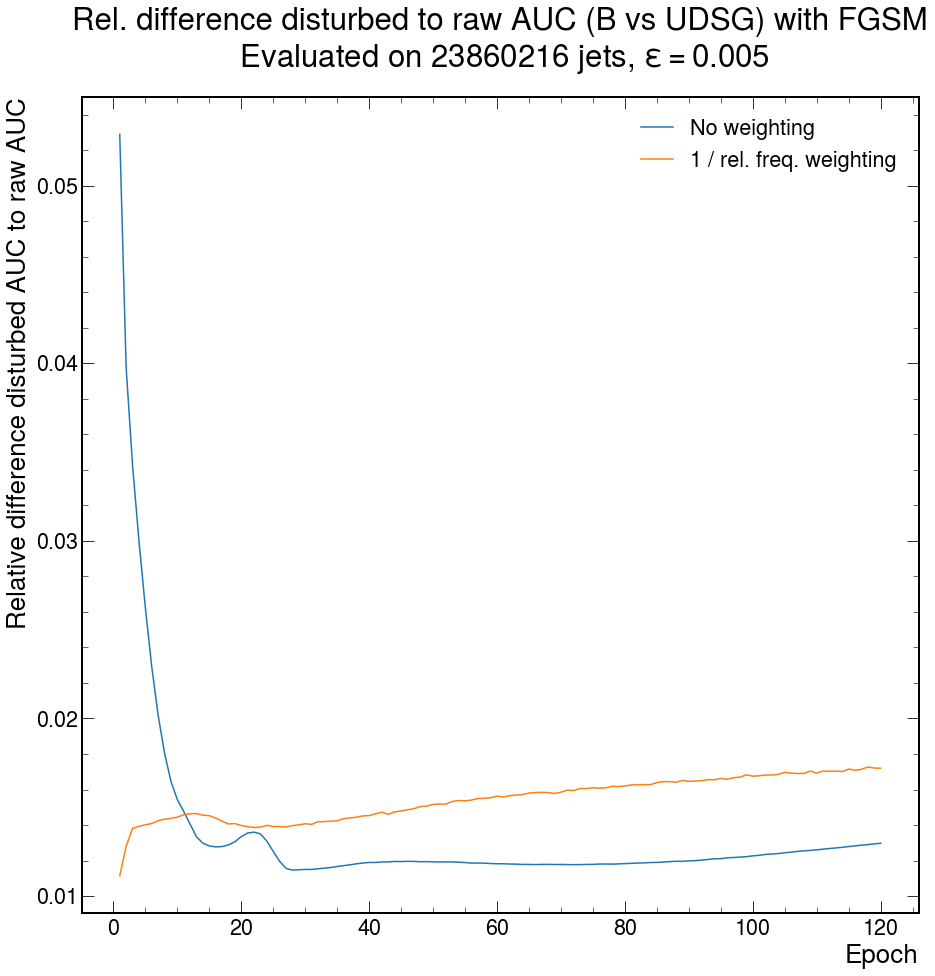

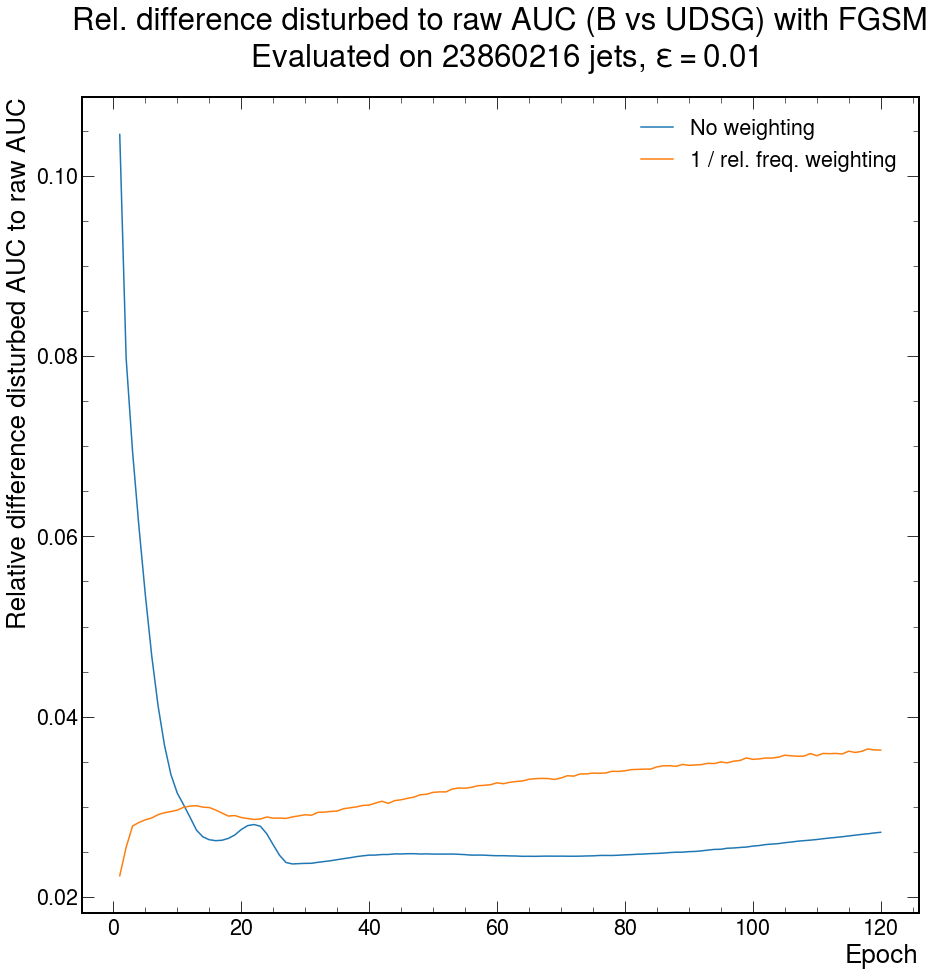

In [89]:
# FGSM

# Diff.
# per method alone
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Difference disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, e in enumerate(epsilons):
        if method == 0:
            plt.plot(at_epoch,auc0_fgsm_diff[i],label=f'$\epsilon={e}$')
        else:
            plt.plot(at_epoch,auc2_fgsm_diff[i],label=f'$\epsilon={e}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_diff_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_diff_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

# both methods on one plot
for i, e in enumerate(epsilons):
    epsi = str(e).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Difference disturbed AUC to raw AUC')
    plt.title(f'Difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, $\epsilon={e}$',y=1.03)
    
    plt.plot(at_epoch,auc0_fgsm_diff[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_fgsm_diff[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_diff_fgsm_{epsi}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

# Ratio
# per method alone    
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Ratio disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, e in enumerate(epsilons):
        if method == 0:
            plt.plot(at_epoch,auc0_fgsm_rel[i],label=f'$\epsilon={e}$')
        else:
            plt.plot(at_epoch,auc2_fgsm_rel[i],label=f'$\epsilon={e}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_ratio_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_ratio_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)    

# both methods on one plot
for i, e in enumerate(epsilons):
    epsi = str(e).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Ratio disturbed AUC to raw AUC')
    plt.title(f'Ratio disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, $\epsilon={e}$',y=1.03)
    
    plt.plot(at_epoch,auc0_fgsm_rel[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_fgsm_rel[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_ratio_fgsm_{epsi}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)

# Rel. diff.
# per method alone    
for method in [0,2]:
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Relative difference disturbed AUC to raw AUC')
    if method == 0:
        plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, No weighting',y=1.03)
    else:
        plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, 1 / rel. freq. weighting',y=1.03)
    
    for i, e in enumerate(epsilons):
        if method == 0:
            plt.plot(at_epoch,auc0_fgsm_diff_rel[i],label=f'$\epsilon={e}$')
        else:
            plt.plot(at_epoch,auc2_fgsm_diff_rel[i],label=f'$\epsilon={e}$')
    plt.legend()
    if method == 0:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_as_is_diff_rel_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    else:
        plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_new_diff_rel_fgsm_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)  
    
# both methods on one plot
for i, e in enumerate(epsilons):
    epsi = str(e).replace('.','')
    plt.figure(5,[15,15])
    plt.xlabel('Epoch')
    plt.ylabel('Relative difference disturbed AUC to raw AUC')
    plt.title(f'Rel. difference disturbed to raw AUC (B vs UDSG) with FGSM\n Evaluated on {int(np.sum(length_data_test))} jets, $\epsilon={e}$',y=1.03)
    
    plt.plot(at_epoch,auc0_fgsm_diff_rel[i],label=f'No weighting')
    plt.plot(at_epoch,auc2_fgsm_diff_rel[i],label=f'1 / rel. freq. weighting')
    plt.legend()
    plt.savefig(f'/home/um106329/aisafety/models/weighted/compare/compare_auc_diff_rel_fgsm_{epsi}_v2.png', bbox_inches='tight', dpi=300, facecolor='w', transparent=False)
    plt.show(block=False)
    time.sleep(5)
    plt.close('all')
    gc.collect(2)